# Handwritten Digit Recognition

In [45]:
#Import necessary libraries
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

### Load the image files

In [46]:
X=[]
y=[]
for ff in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']:
    file = os.listdir(ff)
    for f in file:
        file_path = os.path.join(ff, f)
        print('processing  ',file_path)
        img = cv2.imread(file_path,0) # grayscale
        img=cv2.resize(img,(32,32))
        
        x=img.flatten()
        X.append(x)
        y.append(ff)

processing   0\train_30_00000.png
processing   0\train_30_00001.png
processing   0\train_30_00002.png
processing   0\train_30_00003.png
processing   0\train_30_00004.png
processing   0\train_30_00005.png
processing   0\train_30_00006.png
processing   0\train_30_00007.png
processing   0\train_30_00008.png
processing   0\train_30_00009.png
processing   0\train_30_00010.png
processing   0\train_30_00011.png
processing   0\train_30_00012.png
processing   0\train_30_00013.png
processing   0\train_30_00014.png
processing   0\train_30_00015.png
processing   0\train_30_00016.png
processing   0\train_30_00017.png
processing   0\train_30_00018.png
processing   0\train_30_00019.png
processing   0\train_30_00020.png
processing   0\train_30_00021.png
processing   0\train_30_00022.png
processing   0\train_30_00023.png
processing   0\train_30_00024.png
processing   0\train_30_00025.png
processing   0\train_30_00026.png
processing   0\train_30_00027.png
processing   0\train_30_00028.png
processing   0

processing   0\train_30_00258.png
processing   0\train_30_00259.png
processing   0\train_30_00260.png
processing   0\train_30_00261.png
processing   0\train_30_00262.png
processing   0\train_30_00263.png
processing   0\train_30_00264.png
processing   0\train_30_00265.png
processing   0\train_30_00266.png
processing   0\train_30_00267.png
processing   0\train_30_00268.png
processing   0\train_30_00269.png
processing   0\train_30_00270.png
processing   0\train_30_00271.png
processing   0\train_30_00272.png
processing   0\train_30_00273.png
processing   0\train_30_00274.png
processing   0\train_30_00275.png
processing   0\train_30_00276.png
processing   0\train_30_00277.png
processing   0\train_30_00278.png
processing   0\train_30_00279.png
processing   0\train_30_00280.png
processing   0\train_30_00281.png
processing   0\train_30_00282.png
processing   0\train_30_00283.png
processing   0\train_30_00284.png
processing   0\train_30_00285.png
processing   0\train_30_00286.png
processing   0

processing   0\train_30_00518.png
processing   0\train_30_00519.png
processing   0\train_30_00520.png
processing   0\train_30_00521.png
processing   0\train_30_00522.png
processing   0\train_30_00523.png
processing   0\train_30_00524.png
processing   0\train_30_00525.png
processing   0\train_30_00526.png
processing   0\train_30_00527.png
processing   0\train_30_00528.png
processing   0\train_30_00529.png
processing   0\train_30_00530.png
processing   0\train_30_00531.png
processing   0\train_30_00532.png
processing   0\train_30_00533.png
processing   0\train_30_00534.png
processing   0\train_30_00535.png
processing   0\train_30_00536.png
processing   0\train_30_00537.png
processing   0\train_30_00538.png
processing   0\train_30_00539.png
processing   0\train_30_00540.png
processing   0\train_30_00541.png
processing   0\train_30_00542.png
processing   0\train_30_00543.png
processing   0\train_30_00544.png
processing   0\train_30_00545.png
processing   0\train_30_00546.png
processing   0

processing   0\train_30_00767.png
processing   0\train_30_00768.png
processing   0\train_30_00769.png
processing   0\train_30_00770.png
processing   0\train_30_00771.png
processing   0\train_30_00772.png
processing   0\train_30_00773.png
processing   0\train_30_00774.png
processing   0\train_30_00775.png
processing   0\train_30_00776.png
processing   0\train_30_00777.png
processing   0\train_30_00778.png
processing   0\train_30_00779.png
processing   0\train_30_00780.png
processing   0\train_30_00781.png
processing   0\train_30_00782.png
processing   0\train_30_00783.png
processing   0\train_30_00784.png
processing   0\train_30_00785.png
processing   0\train_30_00786.png
processing   0\train_30_00787.png
processing   0\train_30_00788.png
processing   0\train_30_00789.png
processing   0\train_30_00790.png
processing   0\train_30_00791.png
processing   0\train_30_00792.png
processing   0\train_30_00793.png
processing   0\train_30_00794.png
processing   0\train_30_00795.png
processing   0

processing   0\train_30_01011.png
processing   0\train_30_01012.png
processing   0\train_30_01013.png
processing   0\train_30_01014.png
processing   0\train_30_01015.png
processing   0\train_30_01016.png
processing   0\train_30_01017.png
processing   0\train_30_01018.png
processing   0\train_30_01019.png
processing   0\train_30_01020.png
processing   0\train_30_01021.png
processing   0\train_30_01022.png
processing   0\train_30_01023.png
processing   0\train_30_01024.png
processing   0\train_30_01025.png
processing   0\train_30_01026.png
processing   0\train_30_01027.png
processing   0\train_30_01028.png
processing   0\train_30_01029.png
processing   0\train_30_01030.png
processing   0\train_30_01031.png
processing   0\train_30_01032.png
processing   0\train_30_01033.png
processing   0\train_30_01034.png
processing   0\train_30_01035.png
processing   0\train_30_01036.png
processing   0\train_30_01037.png
processing   0\train_30_01038.png
processing   0\train_30_01039.png
processing   0

processing   0\train_30_01265.png
processing   0\train_30_01266.png
processing   0\train_30_01267.png
processing   0\train_30_01268.png
processing   0\train_30_01269.png
processing   0\train_30_01270.png
processing   0\train_30_01271.png
processing   0\train_30_01272.png
processing   0\train_30_01273.png
processing   0\train_30_01274.png
processing   0\train_30_01275.png
processing   0\train_30_01276.png
processing   0\train_30_01277.png
processing   0\train_30_01278.png
processing   0\train_30_01279.png
processing   0\train_30_01280.png
processing   0\train_30_01281.png
processing   0\train_30_01282.png
processing   0\train_30_01283.png
processing   0\train_30_01284.png
processing   0\train_30_01285.png
processing   0\train_30_01286.png
processing   0\train_30_01287.png
processing   0\train_30_01288.png
processing   0\train_30_01289.png
processing   0\train_30_01290.png
processing   0\train_30_01291.png
processing   0\train_30_01292.png
processing   0\train_30_01293.png
processing   0

processing   0\train_30_01528.png
processing   0\train_30_01529.png
processing   0\train_30_01530.png
processing   0\train_30_01531.png
processing   0\train_30_01532.png
processing   0\train_30_01533.png
processing   0\train_30_01534.png
processing   0\train_30_01535.png
processing   0\train_30_01536.png
processing   0\train_30_01537.png
processing   0\train_30_01538.png
processing   0\train_30_01539.png
processing   0\train_30_01540.png
processing   0\train_30_01541.png
processing   0\train_30_01542.png
processing   0\train_30_01543.png
processing   0\train_30_01544.png
processing   0\train_30_01545.png
processing   0\train_30_01546.png
processing   0\train_30_01547.png
processing   0\train_30_01548.png
processing   0\train_30_01549.png
processing   0\train_30_01550.png
processing   0\train_30_01551.png
processing   0\train_30_01552.png
processing   0\train_30_01553.png
processing   0\train_30_01554.png
processing   0\train_30_01555.png
processing   0\train_30_01556.png
processing   0

processing   0\train_30_01790.png
processing   0\train_30_01791.png
processing   0\train_30_01792.png
processing   0\train_30_01793.png
processing   0\train_30_01794.png
processing   0\train_30_01795.png
processing   0\train_30_01796.png
processing   0\train_30_01797.png
processing   0\train_30_01798.png
processing   0\train_30_01799.png
processing   0\train_30_01800.png
processing   0\train_30_01801.png
processing   0\train_30_01802.png
processing   0\train_30_01803.png
processing   0\train_30_01804.png
processing   0\train_30_01805.png
processing   0\train_30_01806.png
processing   0\train_30_01807.png
processing   0\train_30_01808.png
processing   0\train_30_01809.png
processing   0\train_30_01810.png
processing   0\train_30_01811.png
processing   0\train_30_01812.png
processing   0\train_30_01813.png
processing   0\train_30_01814.png
processing   0\train_30_01815.png
processing   0\train_30_01816.png
processing   0\train_30_01817.png
processing   0\train_30_01818.png
processing   0

processing   0\train_30_02031.png
processing   0\train_30_02032.png
processing   0\train_30_02033.png
processing   0\train_30_02034.png
processing   0\train_30_02035.png
processing   0\train_30_02036.png
processing   0\train_30_02037.png
processing   0\train_30_02038.png
processing   0\train_30_02039.png
processing   0\train_30_02040.png
processing   0\train_30_02041.png
processing   0\train_30_02042.png
processing   0\train_30_02043.png
processing   0\train_30_02044.png
processing   0\train_30_02045.png
processing   0\train_30_02046.png
processing   0\train_30_02047.png
processing   0\train_30_02048.png
processing   0\train_30_02049.png
processing   0\train_30_02050.png
processing   0\train_30_02051.png
processing   0\train_30_02052.png
processing   0\train_30_02053.png
processing   0\train_30_02054.png
processing   0\train_30_02055.png
processing   0\train_30_02056.png
processing   0\train_30_02057.png
processing   0\train_30_02058.png
processing   0\train_30_02059.png
processing   0

processing   0\train_30_02286.png
processing   0\train_30_02287.png
processing   0\train_30_02288.png
processing   0\train_30_02289.png
processing   0\train_30_02290.png
processing   0\train_30_02291.png
processing   0\train_30_02292.png
processing   0\train_30_02293.png
processing   0\train_30_02294.png
processing   0\train_30_02295.png
processing   0\train_30_02296.png
processing   0\train_30_02297.png
processing   0\train_30_02298.png
processing   0\train_30_02299.png
processing   0\train_30_02300.png
processing   0\train_30_02301.png
processing   0\train_30_02302.png
processing   0\train_30_02303.png
processing   0\train_30_02304.png
processing   0\train_30_02305.png
processing   0\train_30_02306.png
processing   0\train_30_02307.png
processing   0\train_30_02308.png
processing   0\train_30_02309.png
processing   0\train_30_02310.png
processing   0\train_30_02311.png
processing   0\train_30_02312.png
processing   0\train_30_02313.png
processing   0\train_30_02314.png
processing   0

processing   0\train_30_02531.png
processing   0\train_30_02532.png
processing   0\train_30_02533.png
processing   0\train_30_02534.png
processing   0\train_30_02535.png
processing   0\train_30_02536.png
processing   0\train_30_02537.png
processing   0\train_30_02538.png
processing   0\train_30_02539.png
processing   0\train_30_02540.png
processing   0\train_30_02541.png
processing   0\train_30_02542.png
processing   0\train_30_02543.png
processing   0\train_30_02544.png
processing   0\train_30_02545.png
processing   0\train_30_02546.png
processing   0\train_30_02547.png
processing   0\train_30_02548.png
processing   0\train_30_02549.png
processing   0\train_30_02550.png
processing   0\train_30_02551.png
processing   0\train_30_02552.png
processing   0\train_30_02553.png
processing   0\train_30_02554.png
processing   0\train_30_02555.png
processing   0\train_30_02556.png
processing   0\train_30_02557.png
processing   0\train_30_02558.png
processing   0\train_30_02559.png
processing   0

processing   0\train_30_02797.png
processing   0\train_30_02798.png
processing   0\train_30_02799.png
processing   0\train_30_02800.png
processing   0\train_30_02801.png
processing   0\train_30_02802.png
processing   0\train_30_02803.png
processing   0\train_30_02804.png
processing   0\train_30_02805.png
processing   0\train_30_02806.png
processing   0\train_30_02807.png
processing   0\train_30_02808.png
processing   0\train_30_02809.png
processing   0\train_30_02810.png
processing   0\train_30_02811.png
processing   0\train_30_02812.png
processing   0\train_30_02813.png
processing   0\train_30_02814.png
processing   0\train_30_02815.png
processing   0\train_30_02816.png
processing   0\train_30_02817.png
processing   0\train_30_02818.png
processing   0\train_30_02819.png
processing   0\train_30_02820.png
processing   0\train_30_02821.png
processing   0\train_30_02822.png
processing   0\train_30_02823.png
processing   0\train_30_02824.png
processing   0\train_30_02825.png
processing   0

processing   1\train_31_00042.png
processing   1\train_31_00043.png
processing   1\train_31_00044.png
processing   1\train_31_00045.png
processing   1\train_31_00046.png
processing   1\train_31_00047.png
processing   1\train_31_00048.png
processing   1\train_31_00049.png
processing   1\train_31_00050.png
processing   1\train_31_00051.png
processing   1\train_31_00052.png
processing   1\train_31_00053.png
processing   1\train_31_00054.png
processing   1\train_31_00055.png
processing   1\train_31_00056.png
processing   1\train_31_00057.png
processing   1\train_31_00058.png
processing   1\train_31_00059.png
processing   1\train_31_00060.png
processing   1\train_31_00061.png
processing   1\train_31_00062.png
processing   1\train_31_00063.png
processing   1\train_31_00064.png
processing   1\train_31_00065.png
processing   1\train_31_00066.png
processing   1\train_31_00067.png
processing   1\train_31_00068.png
processing   1\train_31_00069.png
processing   1\train_31_00070.png
processing   1

processing   1\train_31_00348.png
processing   1\train_31_00349.png
processing   1\train_31_00350.png
processing   1\train_31_00351.png
processing   1\train_31_00352.png
processing   1\train_31_00353.png
processing   1\train_31_00354.png
processing   1\train_31_00355.png
processing   1\train_31_00356.png
processing   1\train_31_00357.png
processing   1\train_31_00358.png
processing   1\train_31_00359.png
processing   1\train_31_00360.png
processing   1\train_31_00361.png
processing   1\train_31_00362.png
processing   1\train_31_00363.png
processing   1\train_31_00364.png
processing   1\train_31_00365.png
processing   1\train_31_00366.png
processing   1\train_31_00367.png
processing   1\train_31_00368.png
processing   1\train_31_00369.png
processing   1\train_31_00370.png
processing   1\train_31_00371.png
processing   1\train_31_00372.png
processing   1\train_31_00373.png
processing   1\train_31_00374.png
processing   1\train_31_00375.png
processing   1\train_31_00376.png
processing   1

processing   1\train_31_00660.png
processing   1\train_31_00661.png
processing   1\train_31_00662.png
processing   1\train_31_00663.png
processing   1\train_31_00664.png
processing   1\train_31_00665.png
processing   1\train_31_00666.png
processing   1\train_31_00667.png
processing   1\train_31_00668.png
processing   1\train_31_00669.png
processing   1\train_31_00670.png
processing   1\train_31_00671.png
processing   1\train_31_00672.png
processing   1\train_31_00673.png
processing   1\train_31_00674.png
processing   1\train_31_00675.png
processing   1\train_31_00676.png
processing   1\train_31_00677.png
processing   1\train_31_00678.png
processing   1\train_31_00679.png
processing   1\train_31_00680.png
processing   1\train_31_00681.png
processing   1\train_31_00682.png
processing   1\train_31_00683.png
processing   1\train_31_00684.png
processing   1\train_31_00685.png
processing   1\train_31_00686.png
processing   1\train_31_00687.png
processing   1\train_31_00688.png
processing   1

processing   1\train_31_00931.png
processing   1\train_31_00932.png
processing   1\train_31_00933.png
processing   1\train_31_00934.png
processing   1\train_31_00935.png
processing   1\train_31_00936.png
processing   1\train_31_00937.png
processing   1\train_31_00938.png
processing   1\train_31_00939.png
processing   1\train_31_00940.png
processing   1\train_31_00941.png
processing   1\train_31_00942.png
processing   1\train_31_00943.png
processing   1\train_31_00944.png
processing   1\train_31_00945.png
processing   1\train_31_00946.png
processing   1\train_31_00947.png
processing   1\train_31_00948.png
processing   1\train_31_00949.png
processing   1\train_31_00950.png
processing   1\train_31_00951.png
processing   1\train_31_00952.png
processing   1\train_31_00953.png
processing   1\train_31_00954.png
processing   1\train_31_00955.png
processing   1\train_31_00956.png
processing   1\train_31_00957.png
processing   1\train_31_00958.png
processing   1\train_31_00959.png
processing   1

processing   1\train_31_01188.png
processing   1\train_31_01189.png
processing   1\train_31_01190.png
processing   1\train_31_01191.png
processing   1\train_31_01192.png
processing   1\train_31_01193.png
processing   1\train_31_01194.png
processing   1\train_31_01195.png
processing   1\train_31_01196.png
processing   1\train_31_01197.png
processing   1\train_31_01198.png
processing   1\train_31_01199.png
processing   1\train_31_01200.png
processing   1\train_31_01201.png
processing   1\train_31_01202.png
processing   1\train_31_01203.png
processing   1\train_31_01204.png
processing   1\train_31_01205.png
processing   1\train_31_01206.png
processing   1\train_31_01207.png
processing   1\train_31_01208.png
processing   1\train_31_01209.png
processing   1\train_31_01210.png
processing   1\train_31_01211.png
processing   1\train_31_01212.png
processing   1\train_31_01213.png
processing   1\train_31_01214.png
processing   1\train_31_01215.png
processing   1\train_31_01216.png
processing   1

processing   1\train_31_01545.png
processing   1\train_31_01546.png
processing   1\train_31_01547.png
processing   1\train_31_01548.png
processing   1\train_31_01549.png
processing   1\train_31_01550.png
processing   1\train_31_01551.png
processing   1\train_31_01552.png
processing   1\train_31_01553.png
processing   1\train_31_01554.png
processing   1\train_31_01555.png
processing   1\train_31_01556.png
processing   1\train_31_01557.png
processing   1\train_31_01558.png
processing   1\train_31_01559.png
processing   1\train_31_01560.png
processing   1\train_31_01561.png
processing   1\train_31_01562.png
processing   1\train_31_01563.png
processing   1\train_31_01564.png
processing   1\train_31_01565.png
processing   1\train_31_01566.png
processing   1\train_31_01567.png
processing   1\train_31_01568.png
processing   1\train_31_01569.png
processing   1\train_31_01570.png
processing   1\train_31_01571.png
processing   1\train_31_01572.png
processing   1\train_31_01573.png
processing   1

processing   1\train_31_01831.png
processing   1\train_31_01832.png
processing   1\train_31_01833.png
processing   1\train_31_01834.png
processing   1\train_31_01835.png
processing   1\train_31_01836.png
processing   1\train_31_01837.png
processing   1\train_31_01838.png
processing   1\train_31_01839.png
processing   1\train_31_01840.png
processing   1\train_31_01841.png
processing   1\train_31_01842.png
processing   1\train_31_01843.png
processing   1\train_31_01844.png
processing   1\train_31_01845.png
processing   1\train_31_01846.png
processing   1\train_31_01847.png
processing   1\train_31_01848.png
processing   1\train_31_01849.png
processing   1\train_31_01850.png
processing   1\train_31_01851.png
processing   1\train_31_01852.png
processing   1\train_31_01853.png
processing   1\train_31_01854.png
processing   1\train_31_01855.png
processing   1\train_31_01856.png
processing   1\train_31_01857.png
processing   1\train_31_01858.png
processing   1\train_31_01859.png
processing   1

processing   1\train_31_02130.png
processing   1\train_31_02131.png
processing   1\train_31_02132.png
processing   1\train_31_02133.png
processing   1\train_31_02134.png
processing   1\train_31_02135.png
processing   1\train_31_02136.png
processing   1\train_31_02137.png
processing   1\train_31_02138.png
processing   1\train_31_02139.png
processing   1\train_31_02140.png
processing   1\train_31_02141.png
processing   1\train_31_02142.png
processing   1\train_31_02143.png
processing   1\train_31_02144.png
processing   1\train_31_02145.png
processing   1\train_31_02146.png
processing   1\train_31_02147.png
processing   1\train_31_02148.png
processing   1\train_31_02149.png
processing   1\train_31_02150.png
processing   1\train_31_02151.png
processing   1\train_31_02152.png
processing   1\train_31_02153.png
processing   1\train_31_02154.png
processing   1\train_31_02155.png
processing   1\train_31_02156.png
processing   1\train_31_02157.png
processing   1\train_31_02158.png
processing   1

processing   1\train_31_02437.png
processing   1\train_31_02438.png
processing   1\train_31_02439.png
processing   1\train_31_02440.png
processing   1\train_31_02441.png
processing   1\train_31_02442.png
processing   1\train_31_02443.png
processing   1\train_31_02444.png
processing   1\train_31_02445.png
processing   1\train_31_02446.png
processing   1\train_31_02447.png
processing   1\train_31_02448.png
processing   1\train_31_02449.png
processing   1\train_31_02450.png
processing   1\train_31_02451.png
processing   1\train_31_02452.png
processing   1\train_31_02453.png
processing   1\train_31_02454.png
processing   1\train_31_02455.png
processing   1\train_31_02456.png
processing   1\train_31_02457.png
processing   1\train_31_02458.png
processing   1\train_31_02459.png
processing   1\train_31_02460.png
processing   1\train_31_02461.png
processing   1\train_31_02462.png
processing   1\train_31_02463.png
processing   1\train_31_02464.png
processing   1\train_31_02465.png
processing   1

processing   1\train_31_02725.png
processing   1\train_31_02726.png
processing   1\train_31_02727.png
processing   1\train_31_02728.png
processing   1\train_31_02729.png
processing   1\train_31_02730.png
processing   1\train_31_02731.png
processing   1\train_31_02732.png
processing   1\train_31_02733.png
processing   1\train_31_02734.png
processing   1\train_31_02735.png
processing   1\train_31_02736.png
processing   1\train_31_02737.png
processing   1\train_31_02738.png
processing   1\train_31_02739.png
processing   1\train_31_02740.png
processing   1\train_31_02741.png
processing   1\train_31_02742.png
processing   1\train_31_02743.png
processing   1\train_31_02744.png
processing   1\train_31_02745.png
processing   1\train_31_02746.png
processing   1\train_31_02747.png
processing   1\train_31_02748.png
processing   1\train_31_02749.png
processing   1\train_31_02750.png
processing   1\train_31_02751.png
processing   1\train_31_02752.png
processing   1\train_31_02753.png
processing   1

processing   2\train_32_00000.png
processing   2\train_32_00001.png
processing   2\train_32_00002.png
processing   2\train_32_00003.png
processing   2\train_32_00004.png
processing   2\train_32_00005.png
processing   2\train_32_00006.png
processing   2\train_32_00007.png
processing   2\train_32_00008.png
processing   2\train_32_00009.png
processing   2\train_32_00010.png
processing   2\train_32_00011.png
processing   2\train_32_00012.png
processing   2\train_32_00013.png
processing   2\train_32_00014.png
processing   2\train_32_00015.png
processing   2\train_32_00016.png
processing   2\train_32_00017.png
processing   2\train_32_00018.png
processing   2\train_32_00019.png
processing   2\train_32_00020.png
processing   2\train_32_00021.png
processing   2\train_32_00022.png
processing   2\train_32_00023.png
processing   2\train_32_00024.png
processing   2\train_32_00025.png
processing   2\train_32_00026.png
processing   2\train_32_00027.png
processing   2\train_32_00028.png
processing   2

processing   2\train_32_00241.png
processing   2\train_32_00242.png
processing   2\train_32_00243.png
processing   2\train_32_00244.png
processing   2\train_32_00245.png
processing   2\train_32_00246.png
processing   2\train_32_00247.png
processing   2\train_32_00248.png
processing   2\train_32_00249.png
processing   2\train_32_00250.png
processing   2\train_32_00251.png
processing   2\train_32_00252.png
processing   2\train_32_00253.png
processing   2\train_32_00254.png
processing   2\train_32_00255.png
processing   2\train_32_00256.png
processing   2\train_32_00257.png
processing   2\train_32_00258.png
processing   2\train_32_00259.png
processing   2\train_32_00260.png
processing   2\train_32_00261.png
processing   2\train_32_00262.png
processing   2\train_32_00263.png
processing   2\train_32_00264.png
processing   2\train_32_00265.png
processing   2\train_32_00266.png
processing   2\train_32_00267.png
processing   2\train_32_00268.png
processing   2\train_32_00269.png
processing   2

processing   2\train_32_00488.png
processing   2\train_32_00489.png
processing   2\train_32_00490.png
processing   2\train_32_00491.png
processing   2\train_32_00492.png
processing   2\train_32_00493.png
processing   2\train_32_00494.png
processing   2\train_32_00495.png
processing   2\train_32_00496.png
processing   2\train_32_00497.png
processing   2\train_32_00498.png
processing   2\train_32_00499.png
processing   2\train_32_00500.png
processing   2\train_32_00501.png
processing   2\train_32_00502.png
processing   2\train_32_00503.png
processing   2\train_32_00504.png
processing   2\train_32_00505.png
processing   2\train_32_00506.png
processing   2\train_32_00507.png
processing   2\train_32_00508.png
processing   2\train_32_00509.png
processing   2\train_32_00510.png
processing   2\train_32_00511.png
processing   2\train_32_00512.png
processing   2\train_32_00513.png
processing   2\train_32_00514.png
processing   2\train_32_00515.png
processing   2\train_32_00516.png
processing   2

processing   2\train_32_00752.png
processing   2\train_32_00753.png
processing   2\train_32_00754.png
processing   2\train_32_00755.png
processing   2\train_32_00756.png
processing   2\train_32_00757.png
processing   2\train_32_00758.png
processing   2\train_32_00759.png
processing   2\train_32_00760.png
processing   2\train_32_00761.png
processing   2\train_32_00762.png
processing   2\train_32_00763.png
processing   2\train_32_00764.png
processing   2\train_32_00765.png
processing   2\train_32_00766.png
processing   2\train_32_00767.png
processing   2\train_32_00768.png
processing   2\train_32_00769.png
processing   2\train_32_00770.png
processing   2\train_32_00771.png
processing   2\train_32_00772.png
processing   2\train_32_00773.png
processing   2\train_32_00774.png
processing   2\train_32_00775.png
processing   2\train_32_00776.png
processing   2\train_32_00777.png
processing   2\train_32_00778.png
processing   2\train_32_00779.png
processing   2\train_32_00780.png
processing   2

processing   2\train_32_01050.png
processing   2\train_32_01051.png
processing   2\train_32_01052.png
processing   2\train_32_01053.png
processing   2\train_32_01054.png
processing   2\train_32_01055.png
processing   2\train_32_01056.png
processing   2\train_32_01057.png
processing   2\train_32_01058.png
processing   2\train_32_01059.png
processing   2\train_32_01060.png
processing   2\train_32_01061.png
processing   2\train_32_01062.png
processing   2\train_32_01063.png
processing   2\train_32_01064.png
processing   2\train_32_01065.png
processing   2\train_32_01066.png
processing   2\train_32_01067.png
processing   2\train_32_01068.png
processing   2\train_32_01069.png
processing   2\train_32_01070.png
processing   2\train_32_01071.png
processing   2\train_32_01072.png
processing   2\train_32_01073.png
processing   2\train_32_01074.png
processing   2\train_32_01075.png
processing   2\train_32_01076.png
processing   2\train_32_01077.png
processing   2\train_32_01078.png
processing   2

processing   2\train_32_01298.png
processing   2\train_32_01299.png
processing   2\train_32_01300.png
processing   2\train_32_01301.png
processing   2\train_32_01302.png
processing   2\train_32_01303.png
processing   2\train_32_01304.png
processing   2\train_32_01305.png
processing   2\train_32_01306.png
processing   2\train_32_01307.png
processing   2\train_32_01308.png
processing   2\train_32_01309.png
processing   2\train_32_01310.png
processing   2\train_32_01311.png
processing   2\train_32_01312.png
processing   2\train_32_01313.png
processing   2\train_32_01314.png
processing   2\train_32_01315.png
processing   2\train_32_01316.png
processing   2\train_32_01317.png
processing   2\train_32_01318.png
processing   2\train_32_01319.png
processing   2\train_32_01320.png
processing   2\train_32_01321.png
processing   2\train_32_01322.png
processing   2\train_32_01323.png
processing   2\train_32_01324.png
processing   2\train_32_01325.png
processing   2\train_32_01326.png
processing   2

processing   2\train_32_01568.png
processing   2\train_32_01569.png
processing   2\train_32_01570.png
processing   2\train_32_01571.png
processing   2\train_32_01572.png
processing   2\train_32_01573.png
processing   2\train_32_01574.png
processing   2\train_32_01575.png
processing   2\train_32_01576.png
processing   2\train_32_01577.png
processing   2\train_32_01578.png
processing   2\train_32_01579.png
processing   2\train_32_01580.png
processing   2\train_32_01581.png
processing   2\train_32_01582.png
processing   2\train_32_01583.png
processing   2\train_32_01584.png
processing   2\train_32_01585.png
processing   2\train_32_01586.png
processing   2\train_32_01587.png
processing   2\train_32_01588.png
processing   2\train_32_01589.png
processing   2\train_32_01590.png
processing   2\train_32_01591.png
processing   2\train_32_01592.png
processing   2\train_32_01593.png
processing   2\train_32_01594.png
processing   2\train_32_01595.png
processing   2\train_32_01596.png
processing   2

processing   2\train_32_01878.png
processing   2\train_32_01879.png
processing   2\train_32_01880.png
processing   2\train_32_01881.png
processing   2\train_32_01882.png
processing   2\train_32_01883.png
processing   2\train_32_01884.png
processing   2\train_32_01885.png
processing   2\train_32_01886.png
processing   2\train_32_01887.png
processing   2\train_32_01888.png
processing   2\train_32_01889.png
processing   2\train_32_01890.png
processing   2\train_32_01891.png
processing   2\train_32_01892.png
processing   2\train_32_01893.png
processing   2\train_32_01894.png
processing   2\train_32_01895.png
processing   2\train_32_01896.png
processing   2\train_32_01897.png
processing   2\train_32_01898.png
processing   2\train_32_01899.png
processing   2\train_32_01900.png
processing   2\train_32_01901.png
processing   2\train_32_01902.png
processing   2\train_32_01903.png
processing   2\train_32_01904.png
processing   2\train_32_01905.png
processing   2\train_32_01906.png
processing   2

processing   2\train_32_02128.png
processing   2\train_32_02129.png
processing   2\train_32_02130.png
processing   2\train_32_02131.png
processing   2\train_32_02132.png
processing   2\train_32_02133.png
processing   2\train_32_02134.png
processing   2\train_32_02135.png
processing   2\train_32_02136.png
processing   2\train_32_02137.png
processing   2\train_32_02138.png
processing   2\train_32_02139.png
processing   2\train_32_02140.png
processing   2\train_32_02141.png
processing   2\train_32_02142.png
processing   2\train_32_02143.png
processing   2\train_32_02144.png
processing   2\train_32_02145.png
processing   2\train_32_02146.png
processing   2\train_32_02147.png
processing   2\train_32_02148.png
processing   2\train_32_02149.png
processing   2\train_32_02150.png
processing   2\train_32_02151.png
processing   2\train_32_02152.png
processing   2\train_32_02153.png
processing   2\train_32_02154.png
processing   2\train_32_02155.png
processing   2\train_32_02156.png
processing   2

processing   2\train_32_02384.png
processing   2\train_32_02385.png
processing   2\train_32_02386.png
processing   2\train_32_02387.png
processing   2\train_32_02388.png
processing   2\train_32_02389.png
processing   2\train_32_02390.png
processing   2\train_32_02391.png
processing   2\train_32_02392.png
processing   2\train_32_02393.png
processing   2\train_32_02394.png
processing   2\train_32_02395.png
processing   2\train_32_02396.png
processing   2\train_32_02397.png
processing   2\train_32_02398.png
processing   2\train_32_02399.png
processing   2\train_32_02400.png
processing   2\train_32_02401.png
processing   2\train_32_02402.png
processing   2\train_32_02403.png
processing   2\train_32_02404.png
processing   2\train_32_02405.png
processing   2\train_32_02406.png
processing   2\train_32_02407.png
processing   2\train_32_02408.png
processing   2\train_32_02409.png
processing   2\train_32_02410.png
processing   2\train_32_02411.png
processing   2\train_32_02412.png
processing   2

processing   2\train_32_02669.png
processing   2\train_32_02670.png
processing   2\train_32_02671.png
processing   2\train_32_02672.png
processing   2\train_32_02673.png
processing   2\train_32_02674.png
processing   2\train_32_02675.png
processing   2\train_32_02676.png
processing   2\train_32_02677.png
processing   2\train_32_02678.png
processing   2\train_32_02679.png
processing   2\train_32_02680.png
processing   2\train_32_02681.png
processing   2\train_32_02682.png
processing   2\train_32_02683.png
processing   2\train_32_02684.png
processing   2\train_32_02685.png
processing   2\train_32_02686.png
processing   2\train_32_02687.png
processing   2\train_32_02688.png
processing   2\train_32_02689.png
processing   2\train_32_02690.png
processing   2\train_32_02691.png
processing   2\train_32_02692.png
processing   2\train_32_02693.png
processing   2\train_32_02694.png
processing   2\train_32_02695.png
processing   2\train_32_02696.png
processing   2\train_32_02697.png
processing   2

processing   2\train_32_02933.png
processing   2\train_32_02934.png
processing   2\train_32_02935.png
processing   2\train_32_02936.png
processing   2\train_32_02937.png
processing   2\train_32_02938.png
processing   2\train_32_02939.png
processing   2\train_32_02940.png
processing   2\train_32_02941.png
processing   2\train_32_02942.png
processing   2\train_32_02943.png
processing   2\train_32_02944.png
processing   2\train_32_02945.png
processing   2\train_32_02946.png
processing   2\train_32_02947.png
processing   2\train_32_02948.png
processing   2\train_32_02949.png
processing   2\train_32_02950.png
processing   2\train_32_02951.png
processing   2\train_32_02952.png
processing   2\train_32_02953.png
processing   2\train_32_02954.png
processing   2\train_32_02955.png
processing   2\train_32_02956.png
processing   2\train_32_02957.png
processing   2\train_32_02958.png
processing   2\train_32_02959.png
processing   2\train_32_02960.png
processing   2\train_32_02961.png
processing   2

processing   3\train_33_00173.png
processing   3\train_33_00174.png
processing   3\train_33_00175.png
processing   3\train_33_00176.png
processing   3\train_33_00177.png
processing   3\train_33_00178.png
processing   3\train_33_00179.png
processing   3\train_33_00180.png
processing   3\train_33_00181.png
processing   3\train_33_00182.png
processing   3\train_33_00183.png
processing   3\train_33_00184.png
processing   3\train_33_00185.png
processing   3\train_33_00186.png
processing   3\train_33_00187.png
processing   3\train_33_00188.png
processing   3\train_33_00189.png
processing   3\train_33_00190.png
processing   3\train_33_00191.png
processing   3\train_33_00192.png
processing   3\train_33_00193.png
processing   3\train_33_00194.png
processing   3\train_33_00195.png
processing   3\train_33_00196.png
processing   3\train_33_00197.png
processing   3\train_33_00198.png
processing   3\train_33_00199.png
processing   3\train_33_00200.png
processing   3\train_33_00201.png
processing   3

processing   3\train_33_00422.png
processing   3\train_33_00423.png
processing   3\train_33_00424.png
processing   3\train_33_00425.png
processing   3\train_33_00426.png
processing   3\train_33_00427.png
processing   3\train_33_00428.png
processing   3\train_33_00429.png
processing   3\train_33_00430.png
processing   3\train_33_00431.png
processing   3\train_33_00432.png
processing   3\train_33_00433.png
processing   3\train_33_00434.png
processing   3\train_33_00435.png
processing   3\train_33_00436.png
processing   3\train_33_00437.png
processing   3\train_33_00438.png
processing   3\train_33_00439.png
processing   3\train_33_00440.png
processing   3\train_33_00441.png
processing   3\train_33_00442.png
processing   3\train_33_00443.png
processing   3\train_33_00444.png
processing   3\train_33_00445.png
processing   3\train_33_00446.png
processing   3\train_33_00447.png
processing   3\train_33_00448.png
processing   3\train_33_00449.png
processing   3\train_33_00450.png
processing   3

processing   3\train_33_00701.png
processing   3\train_33_00702.png
processing   3\train_33_00703.png
processing   3\train_33_00704.png
processing   3\train_33_00705.png
processing   3\train_33_00706.png
processing   3\train_33_00707.png
processing   3\train_33_00708.png
processing   3\train_33_00709.png
processing   3\train_33_00710.png
processing   3\train_33_00711.png
processing   3\train_33_00712.png
processing   3\train_33_00713.png
processing   3\train_33_00714.png
processing   3\train_33_00715.png
processing   3\train_33_00716.png
processing   3\train_33_00717.png
processing   3\train_33_00718.png
processing   3\train_33_00719.png
processing   3\train_33_00720.png
processing   3\train_33_00721.png
processing   3\train_33_00722.png
processing   3\train_33_00723.png
processing   3\train_33_00724.png
processing   3\train_33_00725.png
processing   3\train_33_00726.png
processing   3\train_33_00727.png
processing   3\train_33_00728.png
processing   3\train_33_00729.png
processing   3

processing   3\train_33_00992.png
processing   3\train_33_00993.png
processing   3\train_33_00994.png
processing   3\train_33_00995.png
processing   3\train_33_00996.png
processing   3\train_33_00997.png
processing   3\train_33_00998.png
processing   3\train_33_00999.png
processing   3\train_33_01000.png
processing   3\train_33_01001.png
processing   3\train_33_01002.png
processing   3\train_33_01003.png
processing   3\train_33_01004.png
processing   3\train_33_01005.png
processing   3\train_33_01006.png
processing   3\train_33_01007.png
processing   3\train_33_01008.png
processing   3\train_33_01009.png
processing   3\train_33_01010.png
processing   3\train_33_01011.png
processing   3\train_33_01012.png
processing   3\train_33_01013.png
processing   3\train_33_01014.png
processing   3\train_33_01015.png
processing   3\train_33_01016.png
processing   3\train_33_01017.png
processing   3\train_33_01018.png
processing   3\train_33_01019.png
processing   3\train_33_01020.png
processing   3

processing   3\train_33_01263.png
processing   3\train_33_01264.png
processing   3\train_33_01265.png
processing   3\train_33_01266.png
processing   3\train_33_01267.png
processing   3\train_33_01268.png
processing   3\train_33_01269.png
processing   3\train_33_01270.png
processing   3\train_33_01271.png
processing   3\train_33_01272.png
processing   3\train_33_01273.png
processing   3\train_33_01274.png
processing   3\train_33_01275.png
processing   3\train_33_01276.png
processing   3\train_33_01277.png
processing   3\train_33_01278.png
processing   3\train_33_01279.png
processing   3\train_33_01280.png
processing   3\train_33_01281.png
processing   3\train_33_01282.png
processing   3\train_33_01283.png
processing   3\train_33_01284.png
processing   3\train_33_01285.png
processing   3\train_33_01286.png
processing   3\train_33_01287.png
processing   3\train_33_01288.png
processing   3\train_33_01289.png
processing   3\train_33_01290.png
processing   3\train_33_01291.png
processing   3

processing   3\train_33_01508.png
processing   3\train_33_01509.png
processing   3\train_33_01510.png
processing   3\train_33_01511.png
processing   3\train_33_01512.png
processing   3\train_33_01513.png
processing   3\train_33_01514.png
processing   3\train_33_01515.png
processing   3\train_33_01516.png
processing   3\train_33_01517.png
processing   3\train_33_01518.png
processing   3\train_33_01519.png
processing   3\train_33_01520.png
processing   3\train_33_01521.png
processing   3\train_33_01522.png
processing   3\train_33_01523.png
processing   3\train_33_01524.png
processing   3\train_33_01525.png
processing   3\train_33_01526.png
processing   3\train_33_01527.png
processing   3\train_33_01528.png
processing   3\train_33_01529.png
processing   3\train_33_01530.png
processing   3\train_33_01531.png
processing   3\train_33_01532.png
processing   3\train_33_01533.png
processing   3\train_33_01534.png
processing   3\train_33_01535.png
processing   3\train_33_01536.png
processing   3

processing   3\train_33_01783.png
processing   3\train_33_01784.png
processing   3\train_33_01785.png
processing   3\train_33_01786.png
processing   3\train_33_01787.png
processing   3\train_33_01788.png
processing   3\train_33_01789.png
processing   3\train_33_01790.png
processing   3\train_33_01791.png
processing   3\train_33_01792.png
processing   3\train_33_01793.png
processing   3\train_33_01794.png
processing   3\train_33_01795.png
processing   3\train_33_01796.png
processing   3\train_33_01797.png
processing   3\train_33_01798.png
processing   3\train_33_01799.png
processing   3\train_33_01800.png
processing   3\train_33_01801.png
processing   3\train_33_01802.png
processing   3\train_33_01803.png
processing   3\train_33_01804.png
processing   3\train_33_01805.png
processing   3\train_33_01806.png
processing   3\train_33_01807.png
processing   3\train_33_01808.png
processing   3\train_33_01809.png
processing   3\train_33_01810.png
processing   3\train_33_01811.png
processing   3

processing   3\train_33_02029.png
processing   3\train_33_02030.png
processing   3\train_33_02031.png
processing   3\train_33_02032.png
processing   3\train_33_02033.png
processing   3\train_33_02034.png
processing   3\train_33_02035.png
processing   3\train_33_02036.png
processing   3\train_33_02037.png
processing   3\train_33_02038.png
processing   3\train_33_02039.png
processing   3\train_33_02040.png
processing   3\train_33_02041.png
processing   3\train_33_02042.png
processing   3\train_33_02043.png
processing   3\train_33_02044.png
processing   3\train_33_02045.png
processing   3\train_33_02046.png
processing   3\train_33_02047.png
processing   3\train_33_02048.png
processing   3\train_33_02049.png
processing   3\train_33_02050.png
processing   3\train_33_02051.png
processing   3\train_33_02052.png
processing   3\train_33_02053.png
processing   3\train_33_02054.png
processing   3\train_33_02055.png
processing   3\train_33_02056.png
processing   3\train_33_02057.png
processing   3

processing   3\train_33_02294.png
processing   3\train_33_02295.png
processing   3\train_33_02296.png
processing   3\train_33_02297.png
processing   3\train_33_02298.png
processing   3\train_33_02299.png
processing   3\train_33_02300.png
processing   3\train_33_02301.png
processing   3\train_33_02302.png
processing   3\train_33_02303.png
processing   3\train_33_02304.png
processing   3\train_33_02305.png
processing   3\train_33_02306.png
processing   3\train_33_02307.png
processing   3\train_33_02308.png
processing   3\train_33_02309.png
processing   3\train_33_02310.png
processing   3\train_33_02311.png
processing   3\train_33_02312.png
processing   3\train_33_02313.png
processing   3\train_33_02314.png
processing   3\train_33_02315.png
processing   3\train_33_02316.png
processing   3\train_33_02317.png
processing   3\train_33_02318.png
processing   3\train_33_02319.png
processing   3\train_33_02320.png
processing   3\train_33_02321.png
processing   3\train_33_02322.png
processing   3

processing   3\train_33_02559.png
processing   3\train_33_02560.png
processing   3\train_33_02561.png
processing   3\train_33_02562.png
processing   3\train_33_02563.png
processing   3\train_33_02564.png
processing   3\train_33_02565.png
processing   3\train_33_02566.png
processing   3\train_33_02567.png
processing   3\train_33_02568.png
processing   3\train_33_02569.png
processing   3\train_33_02570.png
processing   3\train_33_02571.png
processing   3\train_33_02572.png
processing   3\train_33_02573.png
processing   3\train_33_02574.png
processing   3\train_33_02575.png
processing   3\train_33_02576.png
processing   3\train_33_02577.png
processing   3\train_33_02578.png
processing   3\train_33_02579.png
processing   3\train_33_02580.png
processing   3\train_33_02581.png
processing   3\train_33_02582.png
processing   3\train_33_02583.png
processing   3\train_33_02584.png
processing   3\train_33_02585.png
processing   3\train_33_02586.png
processing   3\train_33_02587.png
processing   3

processing   3\train_33_02831.png
processing   3\train_33_02832.png
processing   3\train_33_02833.png
processing   3\train_33_02834.png
processing   3\train_33_02835.png
processing   3\train_33_02836.png
processing   3\train_33_02837.png
processing   3\train_33_02838.png
processing   3\train_33_02839.png
processing   3\train_33_02840.png
processing   3\train_33_02841.png
processing   3\train_33_02842.png
processing   3\train_33_02843.png
processing   3\train_33_02844.png
processing   3\train_33_02845.png
processing   3\train_33_02846.png
processing   3\train_33_02847.png
processing   3\train_33_02848.png
processing   3\train_33_02849.png
processing   3\train_33_02850.png
processing   3\train_33_02851.png
processing   3\train_33_02852.png
processing   3\train_33_02853.png
processing   3\train_33_02854.png
processing   3\train_33_02855.png
processing   3\train_33_02856.png
processing   3\train_33_02857.png
processing   3\train_33_02858.png
processing   3\train_33_02859.png
processing   3

processing   4\train_34_00090.png
processing   4\train_34_00091.png
processing   4\train_34_00092.png
processing   4\train_34_00093.png
processing   4\train_34_00094.png
processing   4\train_34_00095.png
processing   4\train_34_00096.png
processing   4\train_34_00097.png
processing   4\train_34_00098.png
processing   4\train_34_00099.png
processing   4\train_34_00100.png
processing   4\train_34_00101.png
processing   4\train_34_00102.png
processing   4\train_34_00103.png
processing   4\train_34_00104.png
processing   4\train_34_00105.png
processing   4\train_34_00106.png
processing   4\train_34_00107.png
processing   4\train_34_00108.png
processing   4\train_34_00109.png
processing   4\train_34_00110.png
processing   4\train_34_00111.png
processing   4\train_34_00112.png
processing   4\train_34_00113.png
processing   4\train_34_00114.png
processing   4\train_34_00115.png
processing   4\train_34_00116.png
processing   4\train_34_00117.png
processing   4\train_34_00118.png
processing   4

processing   4\train_34_00331.png
processing   4\train_34_00332.png
processing   4\train_34_00333.png
processing   4\train_34_00334.png
processing   4\train_34_00335.png
processing   4\train_34_00336.png
processing   4\train_34_00337.png
processing   4\train_34_00338.png
processing   4\train_34_00339.png
processing   4\train_34_00340.png
processing   4\train_34_00341.png
processing   4\train_34_00342.png
processing   4\train_34_00343.png
processing   4\train_34_00344.png
processing   4\train_34_00345.png
processing   4\train_34_00346.png
processing   4\train_34_00347.png
processing   4\train_34_00348.png
processing   4\train_34_00349.png
processing   4\train_34_00350.png
processing   4\train_34_00351.png
processing   4\train_34_00352.png
processing   4\train_34_00353.png
processing   4\train_34_00354.png
processing   4\train_34_00355.png
processing   4\train_34_00356.png
processing   4\train_34_00357.png
processing   4\train_34_00358.png
processing   4\train_34_00359.png
processing   4

processing   4\train_34_00612.png
processing   4\train_34_00613.png
processing   4\train_34_00614.png
processing   4\train_34_00615.png
processing   4\train_34_00616.png
processing   4\train_34_00617.png
processing   4\train_34_00618.png
processing   4\train_34_00619.png
processing   4\train_34_00620.png
processing   4\train_34_00621.png
processing   4\train_34_00622.png
processing   4\train_34_00623.png
processing   4\train_34_00624.png
processing   4\train_34_00625.png
processing   4\train_34_00626.png
processing   4\train_34_00627.png
processing   4\train_34_00628.png
processing   4\train_34_00629.png
processing   4\train_34_00630.png
processing   4\train_34_00631.png
processing   4\train_34_00632.png
processing   4\train_34_00633.png
processing   4\train_34_00634.png
processing   4\train_34_00635.png
processing   4\train_34_00636.png
processing   4\train_34_00637.png
processing   4\train_34_00638.png
processing   4\train_34_00639.png
processing   4\train_34_00640.png
processing   4

processing   4\train_34_00881.png
processing   4\train_34_00882.png
processing   4\train_34_00883.png
processing   4\train_34_00884.png
processing   4\train_34_00885.png
processing   4\train_34_00886.png
processing   4\train_34_00887.png
processing   4\train_34_00888.png
processing   4\train_34_00889.png
processing   4\train_34_00890.png
processing   4\train_34_00891.png
processing   4\train_34_00892.png
processing   4\train_34_00893.png
processing   4\train_34_00894.png
processing   4\train_34_00895.png
processing   4\train_34_00896.png
processing   4\train_34_00897.png
processing   4\train_34_00898.png
processing   4\train_34_00899.png
processing   4\train_34_00900.png
processing   4\train_34_00901.png
processing   4\train_34_00902.png
processing   4\train_34_00903.png
processing   4\train_34_00904.png
processing   4\train_34_00905.png
processing   4\train_34_00906.png
processing   4\train_34_00907.png
processing   4\train_34_00908.png
processing   4\train_34_00909.png
processing   4

processing   4\train_34_01163.png
processing   4\train_34_01164.png
processing   4\train_34_01165.png
processing   4\train_34_01166.png
processing   4\train_34_01167.png
processing   4\train_34_01168.png
processing   4\train_34_01169.png
processing   4\train_34_01170.png
processing   4\train_34_01171.png
processing   4\train_34_01172.png
processing   4\train_34_01173.png
processing   4\train_34_01174.png
processing   4\train_34_01175.png
processing   4\train_34_01176.png
processing   4\train_34_01177.png
processing   4\train_34_01178.png
processing   4\train_34_01179.png
processing   4\train_34_01180.png
processing   4\train_34_01181.png
processing   4\train_34_01182.png
processing   4\train_34_01183.png
processing   4\train_34_01184.png
processing   4\train_34_01185.png
processing   4\train_34_01186.png
processing   4\train_34_01187.png
processing   4\train_34_01188.png
processing   4\train_34_01189.png
processing   4\train_34_01190.png
processing   4\train_34_01191.png
processing   4

processing   4\train_34_01434.png
processing   4\train_34_01435.png
processing   4\train_34_01436.png
processing   4\train_34_01437.png
processing   4\train_34_01438.png
processing   4\train_34_01439.png
processing   4\train_34_01440.png
processing   4\train_34_01441.png
processing   4\train_34_01442.png
processing   4\train_34_01443.png
processing   4\train_34_01444.png
processing   4\train_34_01445.png
processing   4\train_34_01446.png
processing   4\train_34_01447.png
processing   4\train_34_01448.png
processing   4\train_34_01449.png
processing   4\train_34_01450.png
processing   4\train_34_01451.png
processing   4\train_34_01452.png
processing   4\train_34_01453.png
processing   4\train_34_01454.png
processing   4\train_34_01455.png
processing   4\train_34_01456.png
processing   4\train_34_01457.png
processing   4\train_34_01458.png
processing   4\train_34_01459.png
processing   4\train_34_01460.png
processing   4\train_34_01461.png
processing   4\train_34_01462.png
processing   4

processing   4\train_34_01699.png
processing   4\train_34_01700.png
processing   4\train_34_01701.png
processing   4\train_34_01702.png
processing   4\train_34_01703.png
processing   4\train_34_01704.png
processing   4\train_34_01705.png
processing   4\train_34_01706.png
processing   4\train_34_01707.png
processing   4\train_34_01708.png
processing   4\train_34_01709.png
processing   4\train_34_01710.png
processing   4\train_34_01711.png
processing   4\train_34_01712.png
processing   4\train_34_01713.png
processing   4\train_34_01714.png
processing   4\train_34_01715.png
processing   4\train_34_01716.png
processing   4\train_34_01717.png
processing   4\train_34_01718.png
processing   4\train_34_01719.png
processing   4\train_34_01720.png
processing   4\train_34_01721.png
processing   4\train_34_01722.png
processing   4\train_34_01723.png
processing   4\train_34_01724.png
processing   4\train_34_01725.png
processing   4\train_34_01726.png
processing   4\train_34_01727.png
processing   4

processing   4\train_34_01944.png
processing   4\train_34_01945.png
processing   4\train_34_01946.png
processing   4\train_34_01947.png
processing   4\train_34_01948.png
processing   4\train_34_01949.png
processing   4\train_34_01950.png
processing   4\train_34_01951.png
processing   4\train_34_01952.png
processing   4\train_34_01953.png
processing   4\train_34_01954.png
processing   4\train_34_01955.png
processing   4\train_34_01956.png
processing   4\train_34_01957.png
processing   4\train_34_01958.png
processing   4\train_34_01959.png
processing   4\train_34_01960.png
processing   4\train_34_01961.png
processing   4\train_34_01962.png
processing   4\train_34_01963.png
processing   4\train_34_01964.png
processing   4\train_34_01965.png
processing   4\train_34_01966.png
processing   4\train_34_01967.png
processing   4\train_34_01968.png
processing   4\train_34_01969.png
processing   4\train_34_01970.png
processing   4\train_34_01971.png
processing   4\train_34_01972.png
processing   4

processing   4\train_34_02200.png
processing   4\train_34_02201.png
processing   4\train_34_02202.png
processing   4\train_34_02203.png
processing   4\train_34_02204.png
processing   4\train_34_02205.png
processing   4\train_34_02206.png
processing   4\train_34_02207.png
processing   4\train_34_02208.png
processing   4\train_34_02209.png
processing   4\train_34_02210.png
processing   4\train_34_02211.png
processing   4\train_34_02212.png
processing   4\train_34_02213.png
processing   4\train_34_02214.png
processing   4\train_34_02215.png
processing   4\train_34_02216.png
processing   4\train_34_02217.png
processing   4\train_34_02218.png
processing   4\train_34_02219.png
processing   4\train_34_02220.png
processing   4\train_34_02221.png
processing   4\train_34_02222.png
processing   4\train_34_02223.png
processing   4\train_34_02224.png
processing   4\train_34_02225.png
processing   4\train_34_02226.png
processing   4\train_34_02227.png
processing   4\train_34_02228.png
processing   4

processing   4\train_34_02470.png
processing   4\train_34_02471.png
processing   4\train_34_02472.png
processing   4\train_34_02473.png
processing   4\train_34_02474.png
processing   4\train_34_02475.png
processing   4\train_34_02476.png
processing   4\train_34_02477.png
processing   4\train_34_02478.png
processing   4\train_34_02479.png
processing   4\train_34_02480.png
processing   4\train_34_02481.png
processing   4\train_34_02482.png
processing   4\train_34_02483.png
processing   4\train_34_02484.png
processing   4\train_34_02485.png
processing   4\train_34_02486.png
processing   4\train_34_02487.png
processing   4\train_34_02488.png
processing   4\train_34_02489.png
processing   4\train_34_02490.png
processing   4\train_34_02491.png
processing   4\train_34_02492.png
processing   4\train_34_02493.png
processing   4\train_34_02494.png
processing   4\train_34_02495.png
processing   4\train_34_02496.png
processing   4\train_34_02497.png
processing   4\train_34_02498.png
processing   4

processing   4\train_34_02718.png
processing   4\train_34_02719.png
processing   4\train_34_02720.png
processing   4\train_34_02721.png
processing   4\train_34_02722.png
processing   4\train_34_02723.png
processing   4\train_34_02724.png
processing   4\train_34_02725.png
processing   4\train_34_02726.png
processing   4\train_34_02727.png
processing   4\train_34_02728.png
processing   4\train_34_02729.png
processing   4\train_34_02730.png
processing   4\train_34_02731.png
processing   4\train_34_02732.png
processing   4\train_34_02733.png
processing   4\train_34_02734.png
processing   4\train_34_02735.png
processing   4\train_34_02736.png
processing   4\train_34_02737.png
processing   4\train_34_02738.png
processing   4\train_34_02739.png
processing   4\train_34_02740.png
processing   4\train_34_02741.png
processing   4\train_34_02742.png
processing   4\train_34_02743.png
processing   4\train_34_02744.png
processing   4\train_34_02745.png
processing   4\train_34_02746.png
processing   4

processing   4\train_34_02965.png
processing   4\train_34_02966.png
processing   4\train_34_02967.png
processing   4\train_34_02968.png
processing   4\train_34_02969.png
processing   4\train_34_02970.png
processing   4\train_34_02971.png
processing   4\train_34_02972.png
processing   4\train_34_02973.png
processing   4\train_34_02974.png
processing   4\train_34_02975.png
processing   4\train_34_02976.png
processing   4\train_34_02977.png
processing   4\train_34_02978.png
processing   4\train_34_02979.png
processing   4\train_34_02980.png
processing   4\train_34_02981.png
processing   4\train_34_02982.png
processing   4\train_34_02983.png
processing   4\train_34_02984.png
processing   4\train_34_02985.png
processing   4\train_34_02986.png
processing   4\train_34_02987.png
processing   4\train_34_02988.png
processing   4\train_34_02989.png
processing   4\train_34_02990.png
processing   4\train_34_02991.png
processing   4\train_34_02992.png
processing   4\train_34_02993.png
processing   4

processing   5\train_35_00208.png
processing   5\train_35_00209.png
processing   5\train_35_00210.png
processing   5\train_35_00211.png
processing   5\train_35_00212.png
processing   5\train_35_00213.png
processing   5\train_35_00214.png
processing   5\train_35_00215.png
processing   5\train_35_00216.png
processing   5\train_35_00217.png
processing   5\train_35_00218.png
processing   5\train_35_00219.png
processing   5\train_35_00220.png
processing   5\train_35_00221.png
processing   5\train_35_00222.png
processing   5\train_35_00223.png
processing   5\train_35_00224.png
processing   5\train_35_00225.png
processing   5\train_35_00226.png
processing   5\train_35_00227.png
processing   5\train_35_00228.png
processing   5\train_35_00229.png
processing   5\train_35_00230.png
processing   5\train_35_00231.png
processing   5\train_35_00232.png
processing   5\train_35_00233.png
processing   5\train_35_00234.png
processing   5\train_35_00235.png
processing   5\train_35_00236.png
processing   5

processing   5\train_35_00451.png
processing   5\train_35_00452.png
processing   5\train_35_00453.png
processing   5\train_35_00454.png
processing   5\train_35_00455.png
processing   5\train_35_00456.png
processing   5\train_35_00457.png
processing   5\train_35_00458.png
processing   5\train_35_00459.png
processing   5\train_35_00460.png
processing   5\train_35_00461.png
processing   5\train_35_00462.png
processing   5\train_35_00463.png
processing   5\train_35_00464.png
processing   5\train_35_00465.png
processing   5\train_35_00466.png
processing   5\train_35_00467.png
processing   5\train_35_00468.png
processing   5\train_35_00469.png
processing   5\train_35_00470.png
processing   5\train_35_00471.png
processing   5\train_35_00472.png
processing   5\train_35_00473.png
processing   5\train_35_00474.png
processing   5\train_35_00475.png
processing   5\train_35_00476.png
processing   5\train_35_00477.png
processing   5\train_35_00478.png
processing   5\train_35_00479.png
processing   5

processing   5\train_35_00733.png
processing   5\train_35_00734.png
processing   5\train_35_00735.png
processing   5\train_35_00736.png
processing   5\train_35_00737.png
processing   5\train_35_00738.png
processing   5\train_35_00739.png
processing   5\train_35_00740.png
processing   5\train_35_00741.png
processing   5\train_35_00742.png
processing   5\train_35_00743.png
processing   5\train_35_00744.png
processing   5\train_35_00745.png
processing   5\train_35_00746.png
processing   5\train_35_00747.png
processing   5\train_35_00748.png
processing   5\train_35_00749.png
processing   5\train_35_00750.png
processing   5\train_35_00751.png
processing   5\train_35_00752.png
processing   5\train_35_00753.png
processing   5\train_35_00754.png
processing   5\train_35_00755.png
processing   5\train_35_00756.png
processing   5\train_35_00757.png
processing   5\train_35_00758.png
processing   5\train_35_00759.png
processing   5\train_35_00760.png
processing   5\train_35_00761.png
processing   5

processing   5\train_35_00995.png
processing   5\train_35_00996.png
processing   5\train_35_00997.png
processing   5\train_35_00998.png
processing   5\train_35_00999.png
processing   5\train_35_01000.png
processing   5\train_35_01001.png
processing   5\train_35_01002.png
processing   5\train_35_01003.png
processing   5\train_35_01004.png
processing   5\train_35_01005.png
processing   5\train_35_01006.png
processing   5\train_35_01007.png
processing   5\train_35_01008.png
processing   5\train_35_01009.png
processing   5\train_35_01010.png
processing   5\train_35_01011.png
processing   5\train_35_01012.png
processing   5\train_35_01013.png
processing   5\train_35_01014.png
processing   5\train_35_01015.png
processing   5\train_35_01016.png
processing   5\train_35_01017.png
processing   5\train_35_01018.png
processing   5\train_35_01019.png
processing   5\train_35_01020.png
processing   5\train_35_01021.png
processing   5\train_35_01022.png
processing   5\train_35_01023.png
processing   5

processing   5\train_35_01237.png
processing   5\train_35_01238.png
processing   5\train_35_01239.png
processing   5\train_35_01240.png
processing   5\train_35_01241.png
processing   5\train_35_01242.png
processing   5\train_35_01243.png
processing   5\train_35_01244.png
processing   5\train_35_01245.png
processing   5\train_35_01246.png
processing   5\train_35_01247.png
processing   5\train_35_01248.png
processing   5\train_35_01249.png
processing   5\train_35_01250.png
processing   5\train_35_01251.png
processing   5\train_35_01252.png
processing   5\train_35_01253.png
processing   5\train_35_01254.png
processing   5\train_35_01255.png
processing   5\train_35_01256.png
processing   5\train_35_01257.png
processing   5\train_35_01258.png
processing   5\train_35_01259.png
processing   5\train_35_01260.png
processing   5\train_35_01261.png
processing   5\train_35_01262.png
processing   5\train_35_01263.png
processing   5\train_35_01264.png
processing   5\train_35_01265.png
processing   5

processing   5\train_35_01491.png
processing   5\train_35_01492.png
processing   5\train_35_01493.png
processing   5\train_35_01494.png
processing   5\train_35_01495.png
processing   5\train_35_01496.png
processing   5\train_35_01497.png
processing   5\train_35_01498.png
processing   5\train_35_01499.png
processing   5\train_35_01500.png
processing   5\train_35_01501.png
processing   5\train_35_01502.png
processing   5\train_35_01503.png
processing   5\train_35_01504.png
processing   5\train_35_01505.png
processing   5\train_35_01506.png
processing   5\train_35_01507.png
processing   5\train_35_01508.png
processing   5\train_35_01509.png
processing   5\train_35_01510.png
processing   5\train_35_01511.png
processing   5\train_35_01512.png
processing   5\train_35_01513.png
processing   5\train_35_01514.png
processing   5\train_35_01515.png
processing   5\train_35_01516.png
processing   5\train_35_01517.png
processing   5\train_35_01518.png
processing   5\train_35_01519.png
processing   5

processing   5\train_35_01738.png
processing   5\train_35_01739.png
processing   5\train_35_01740.png
processing   5\train_35_01741.png
processing   5\train_35_01742.png
processing   5\train_35_01743.png
processing   5\train_35_01744.png
processing   5\train_35_01745.png
processing   5\train_35_01746.png
processing   5\train_35_01747.png
processing   5\train_35_01748.png
processing   5\train_35_01749.png
processing   5\train_35_01750.png
processing   5\train_35_01751.png
processing   5\train_35_01752.png
processing   5\train_35_01753.png
processing   5\train_35_01754.png
processing   5\train_35_01755.png
processing   5\train_35_01756.png
processing   5\train_35_01757.png
processing   5\train_35_01758.png
processing   5\train_35_01759.png
processing   5\train_35_01760.png
processing   5\train_35_01761.png
processing   5\train_35_01762.png
processing   5\train_35_01763.png
processing   5\train_35_01764.png
processing   5\train_35_01765.png
processing   5\train_35_01766.png
processing   5

processing   5\train_35_01982.png
processing   5\train_35_01983.png
processing   5\train_35_01984.png
processing   5\train_35_01985.png
processing   5\train_35_01986.png
processing   5\train_35_01987.png
processing   5\train_35_01988.png
processing   5\train_35_01989.png
processing   5\train_35_01990.png
processing   5\train_35_01991.png
processing   5\train_35_01992.png
processing   5\train_35_01993.png
processing   5\train_35_01994.png
processing   5\train_35_01995.png
processing   5\train_35_01996.png
processing   5\train_35_01997.png
processing   5\train_35_01998.png
processing   5\train_35_01999.png
processing   5\train_35_02000.png
processing   5\train_35_02001.png
processing   5\train_35_02002.png
processing   5\train_35_02003.png
processing   5\train_35_02004.png
processing   5\train_35_02005.png
processing   5\train_35_02006.png
processing   5\train_35_02007.png
processing   5\train_35_02008.png
processing   5\train_35_02009.png
processing   5\train_35_02010.png
processing   5

processing   5\train_35_02257.png
processing   5\train_35_02258.png
processing   5\train_35_02259.png
processing   5\train_35_02260.png
processing   5\train_35_02261.png
processing   5\train_35_02262.png
processing   5\train_35_02263.png
processing   5\train_35_02264.png
processing   5\train_35_02265.png
processing   5\train_35_02266.png
processing   5\train_35_02267.png
processing   5\train_35_02268.png
processing   5\train_35_02269.png
processing   5\train_35_02270.png
processing   5\train_35_02271.png
processing   5\train_35_02272.png
processing   5\train_35_02273.png
processing   5\train_35_02274.png
processing   5\train_35_02275.png
processing   5\train_35_02276.png
processing   5\train_35_02277.png
processing   5\train_35_02278.png
processing   5\train_35_02279.png
processing   5\train_35_02280.png
processing   5\train_35_02281.png
processing   5\train_35_02282.png
processing   5\train_35_02283.png
processing   5\train_35_02284.png
processing   5\train_35_02285.png
processing   5

processing   5\train_35_02548.png
processing   5\train_35_02549.png
processing   5\train_35_02550.png
processing   5\train_35_02551.png
processing   5\train_35_02552.png
processing   5\train_35_02553.png
processing   5\train_35_02554.png
processing   5\train_35_02555.png
processing   5\train_35_02556.png
processing   5\train_35_02557.png
processing   5\train_35_02558.png
processing   5\train_35_02559.png
processing   5\train_35_02560.png
processing   5\train_35_02561.png
processing   5\train_35_02562.png
processing   5\train_35_02563.png
processing   5\train_35_02564.png
processing   5\train_35_02565.png
processing   5\train_35_02566.png
processing   5\train_35_02567.png
processing   5\train_35_02568.png
processing   5\train_35_02569.png
processing   5\train_35_02570.png
processing   5\train_35_02571.png
processing   5\train_35_02572.png
processing   5\train_35_02573.png
processing   5\train_35_02574.png
processing   5\train_35_02575.png
processing   5\train_35_02576.png
processing   5

processing   5\train_35_02799.png
processing   5\train_35_02800.png
processing   5\train_35_02801.png
processing   5\train_35_02802.png
processing   5\train_35_02803.png
processing   5\train_35_02804.png
processing   5\train_35_02805.png
processing   5\train_35_02806.png
processing   5\train_35_02807.png
processing   5\train_35_02808.png
processing   5\train_35_02809.png
processing   5\train_35_02810.png
processing   5\train_35_02811.png
processing   5\train_35_02812.png
processing   5\train_35_02813.png
processing   5\train_35_02814.png
processing   5\train_35_02815.png
processing   5\train_35_02816.png
processing   5\train_35_02817.png
processing   5\train_35_02818.png
processing   5\train_35_02819.png
processing   5\train_35_02820.png
processing   5\train_35_02821.png
processing   5\train_35_02822.png
processing   5\train_35_02823.png
processing   5\train_35_02824.png
processing   5\train_35_02825.png
processing   5\train_35_02826.png
processing   5\train_35_02827.png
processing   5

processing   6\train_36_00044.png
processing   6\train_36_00045.png
processing   6\train_36_00046.png
processing   6\train_36_00047.png
processing   6\train_36_00048.png
processing   6\train_36_00049.png
processing   6\train_36_00050.png
processing   6\train_36_00051.png
processing   6\train_36_00052.png
processing   6\train_36_00053.png
processing   6\train_36_00054.png
processing   6\train_36_00055.png
processing   6\train_36_00056.png
processing   6\train_36_00057.png
processing   6\train_36_00058.png
processing   6\train_36_00059.png
processing   6\train_36_00060.png
processing   6\train_36_00061.png
processing   6\train_36_00062.png
processing   6\train_36_00063.png
processing   6\train_36_00064.png
processing   6\train_36_00065.png
processing   6\train_36_00066.png
processing   6\train_36_00067.png
processing   6\train_36_00068.png
processing   6\train_36_00069.png
processing   6\train_36_00070.png
processing   6\train_36_00071.png
processing   6\train_36_00072.png
processing   6

processing   6\train_36_00294.png
processing   6\train_36_00295.png
processing   6\train_36_00296.png
processing   6\train_36_00297.png
processing   6\train_36_00298.png
processing   6\train_36_00299.png
processing   6\train_36_00300.png
processing   6\train_36_00301.png
processing   6\train_36_00302.png
processing   6\train_36_00303.png
processing   6\train_36_00304.png
processing   6\train_36_00305.png
processing   6\train_36_00306.png
processing   6\train_36_00307.png
processing   6\train_36_00308.png
processing   6\train_36_00309.png
processing   6\train_36_00310.png
processing   6\train_36_00311.png
processing   6\train_36_00312.png
processing   6\train_36_00313.png
processing   6\train_36_00314.png
processing   6\train_36_00315.png
processing   6\train_36_00316.png
processing   6\train_36_00317.png
processing   6\train_36_00318.png
processing   6\train_36_00319.png
processing   6\train_36_00320.png
processing   6\train_36_00321.png
processing   6\train_36_00322.png
processing   6

processing   6\train_36_00579.png
processing   6\train_36_00580.png
processing   6\train_36_00581.png
processing   6\train_36_00582.png
processing   6\train_36_00583.png
processing   6\train_36_00584.png
processing   6\train_36_00585.png
processing   6\train_36_00586.png
processing   6\train_36_00587.png
processing   6\train_36_00588.png
processing   6\train_36_00589.png
processing   6\train_36_00590.png
processing   6\train_36_00591.png
processing   6\train_36_00592.png
processing   6\train_36_00593.png
processing   6\train_36_00594.png
processing   6\train_36_00595.png
processing   6\train_36_00596.png
processing   6\train_36_00597.png
processing   6\train_36_00598.png
processing   6\train_36_00599.png
processing   6\train_36_00600.png
processing   6\train_36_00601.png
processing   6\train_36_00602.png
processing   6\train_36_00603.png
processing   6\train_36_00604.png
processing   6\train_36_00605.png
processing   6\train_36_00606.png
processing   6\train_36_00607.png
processing   6

processing   6\train_36_00847.png
processing   6\train_36_00848.png
processing   6\train_36_00849.png
processing   6\train_36_00850.png
processing   6\train_36_00851.png
processing   6\train_36_00852.png
processing   6\train_36_00853.png
processing   6\train_36_00854.png
processing   6\train_36_00855.png
processing   6\train_36_00856.png
processing   6\train_36_00857.png
processing   6\train_36_00858.png
processing   6\train_36_00859.png
processing   6\train_36_00860.png
processing   6\train_36_00861.png
processing   6\train_36_00862.png
processing   6\train_36_00863.png
processing   6\train_36_00864.png
processing   6\train_36_00865.png
processing   6\train_36_00866.png
processing   6\train_36_00867.png
processing   6\train_36_00868.png
processing   6\train_36_00869.png
processing   6\train_36_00870.png
processing   6\train_36_00871.png
processing   6\train_36_00872.png
processing   6\train_36_00873.png
processing   6\train_36_00874.png
processing   6\train_36_00875.png
processing   6

processing   6\train_36_01090.png
processing   6\train_36_01091.png
processing   6\train_36_01092.png
processing   6\train_36_01093.png
processing   6\train_36_01094.png
processing   6\train_36_01095.png
processing   6\train_36_01096.png
processing   6\train_36_01097.png
processing   6\train_36_01098.png
processing   6\train_36_01099.png
processing   6\train_36_01100.png
processing   6\train_36_01101.png
processing   6\train_36_01102.png
processing   6\train_36_01103.png
processing   6\train_36_01104.png
processing   6\train_36_01105.png
processing   6\train_36_01106.png
processing   6\train_36_01107.png
processing   6\train_36_01108.png
processing   6\train_36_01109.png
processing   6\train_36_01110.png
processing   6\train_36_01111.png
processing   6\train_36_01112.png
processing   6\train_36_01113.png
processing   6\train_36_01114.png
processing   6\train_36_01115.png
processing   6\train_36_01116.png
processing   6\train_36_01117.png
processing   6\train_36_01118.png
processing   6

processing   6\train_36_01333.png
processing   6\train_36_01334.png
processing   6\train_36_01335.png
processing   6\train_36_01336.png
processing   6\train_36_01337.png
processing   6\train_36_01338.png
processing   6\train_36_01339.png
processing   6\train_36_01340.png
processing   6\train_36_01341.png
processing   6\train_36_01342.png
processing   6\train_36_01343.png
processing   6\train_36_01344.png
processing   6\train_36_01345.png
processing   6\train_36_01346.png
processing   6\train_36_01347.png
processing   6\train_36_01348.png
processing   6\train_36_01349.png
processing   6\train_36_01350.png
processing   6\train_36_01351.png
processing   6\train_36_01352.png
processing   6\train_36_01353.png
processing   6\train_36_01354.png
processing   6\train_36_01355.png
processing   6\train_36_01356.png
processing   6\train_36_01357.png
processing   6\train_36_01358.png
processing   6\train_36_01359.png
processing   6\train_36_01360.png
processing   6\train_36_01361.png
processing   6

processing   6\train_36_01586.png
processing   6\train_36_01587.png
processing   6\train_36_01588.png
processing   6\train_36_01589.png
processing   6\train_36_01590.png
processing   6\train_36_01591.png
processing   6\train_36_01592.png
processing   6\train_36_01593.png
processing   6\train_36_01594.png
processing   6\train_36_01595.png
processing   6\train_36_01596.png
processing   6\train_36_01597.png
processing   6\train_36_01598.png
processing   6\train_36_01599.png
processing   6\train_36_01600.png
processing   6\train_36_01601.png
processing   6\train_36_01602.png
processing   6\train_36_01603.png
processing   6\train_36_01604.png
processing   6\train_36_01605.png
processing   6\train_36_01606.png
processing   6\train_36_01607.png
processing   6\train_36_01608.png
processing   6\train_36_01609.png
processing   6\train_36_01610.png
processing   6\train_36_01611.png
processing   6\train_36_01612.png
processing   6\train_36_01613.png
processing   6\train_36_01614.png
processing   6

processing   6\train_36_01851.png
processing   6\train_36_01852.png
processing   6\train_36_01853.png
processing   6\train_36_01854.png
processing   6\train_36_01855.png
processing   6\train_36_01856.png
processing   6\train_36_01857.png
processing   6\train_36_01858.png
processing   6\train_36_01859.png
processing   6\train_36_01860.png
processing   6\train_36_01861.png
processing   6\train_36_01862.png
processing   6\train_36_01863.png
processing   6\train_36_01864.png
processing   6\train_36_01865.png
processing   6\train_36_01866.png
processing   6\train_36_01867.png
processing   6\train_36_01868.png
processing   6\train_36_01869.png
processing   6\train_36_01870.png
processing   6\train_36_01871.png
processing   6\train_36_01872.png
processing   6\train_36_01873.png
processing   6\train_36_01874.png
processing   6\train_36_01875.png
processing   6\train_36_01876.png
processing   6\train_36_01877.png
processing   6\train_36_01878.png
processing   6\train_36_01879.png
processing   6

processing   6\train_36_02096.png
processing   6\train_36_02097.png
processing   6\train_36_02098.png
processing   6\train_36_02099.png
processing   6\train_36_02100.png
processing   6\train_36_02101.png
processing   6\train_36_02102.png
processing   6\train_36_02103.png
processing   6\train_36_02104.png
processing   6\train_36_02105.png
processing   6\train_36_02106.png
processing   6\train_36_02107.png
processing   6\train_36_02108.png
processing   6\train_36_02109.png
processing   6\train_36_02110.png
processing   6\train_36_02111.png
processing   6\train_36_02112.png
processing   6\train_36_02113.png
processing   6\train_36_02114.png
processing   6\train_36_02115.png
processing   6\train_36_02116.png
processing   6\train_36_02117.png
processing   6\train_36_02118.png
processing   6\train_36_02119.png
processing   6\train_36_02120.png
processing   6\train_36_02121.png
processing   6\train_36_02122.png
processing   6\train_36_02123.png
processing   6\train_36_02124.png
processing   6

processing   6\train_36_02353.png
processing   6\train_36_02354.png
processing   6\train_36_02355.png
processing   6\train_36_02356.png
processing   6\train_36_02357.png
processing   6\train_36_02358.png
processing   6\train_36_02359.png
processing   6\train_36_02360.png
processing   6\train_36_02361.png
processing   6\train_36_02362.png
processing   6\train_36_02363.png
processing   6\train_36_02364.png
processing   6\train_36_02365.png
processing   6\train_36_02366.png
processing   6\train_36_02367.png
processing   6\train_36_02368.png
processing   6\train_36_02369.png
processing   6\train_36_02370.png
processing   6\train_36_02371.png
processing   6\train_36_02372.png
processing   6\train_36_02373.png
processing   6\train_36_02374.png
processing   6\train_36_02375.png
processing   6\train_36_02376.png
processing   6\train_36_02377.png
processing   6\train_36_02378.png
processing   6\train_36_02379.png
processing   6\train_36_02380.png
processing   6\train_36_02381.png
processing   6

processing   6\train_36_02597.png
processing   6\train_36_02598.png
processing   6\train_36_02599.png
processing   6\train_36_02600.png
processing   6\train_36_02601.png
processing   6\train_36_02602.png
processing   6\train_36_02603.png
processing   6\train_36_02604.png
processing   6\train_36_02605.png
processing   6\train_36_02606.png
processing   6\train_36_02607.png
processing   6\train_36_02608.png
processing   6\train_36_02609.png
processing   6\train_36_02610.png
processing   6\train_36_02611.png
processing   6\train_36_02612.png
processing   6\train_36_02613.png
processing   6\train_36_02614.png
processing   6\train_36_02615.png
processing   6\train_36_02616.png
processing   6\train_36_02617.png
processing   6\train_36_02618.png
processing   6\train_36_02619.png
processing   6\train_36_02620.png
processing   6\train_36_02621.png
processing   6\train_36_02622.png
processing   6\train_36_02623.png
processing   6\train_36_02624.png
processing   6\train_36_02625.png
processing   6

processing   6\train_36_02885.png
processing   6\train_36_02886.png
processing   6\train_36_02887.png
processing   6\train_36_02888.png
processing   6\train_36_02889.png
processing   6\train_36_02890.png
processing   6\train_36_02891.png
processing   6\train_36_02892.png
processing   6\train_36_02893.png
processing   6\train_36_02894.png
processing   6\train_36_02895.png
processing   6\train_36_02896.png
processing   6\train_36_02897.png
processing   6\train_36_02898.png
processing   6\train_36_02899.png
processing   6\train_36_02900.png
processing   6\train_36_02901.png
processing   6\train_36_02902.png
processing   6\train_36_02903.png
processing   6\train_36_02904.png
processing   6\train_36_02905.png
processing   6\train_36_02906.png
processing   6\train_36_02907.png
processing   6\train_36_02908.png
processing   6\train_36_02909.png
processing   6\train_36_02910.png
processing   6\train_36_02911.png
processing   6\train_36_02912.png
processing   6\train_36_02913.png
processing   6

processing   7\train_37_00127.png
processing   7\train_37_00128.png
processing   7\train_37_00129.png
processing   7\train_37_00130.png
processing   7\train_37_00131.png
processing   7\train_37_00132.png
processing   7\train_37_00133.png
processing   7\train_37_00134.png
processing   7\train_37_00135.png
processing   7\train_37_00136.png
processing   7\train_37_00137.png
processing   7\train_37_00138.png
processing   7\train_37_00139.png
processing   7\train_37_00140.png
processing   7\train_37_00141.png
processing   7\train_37_00142.png
processing   7\train_37_00143.png
processing   7\train_37_00144.png
processing   7\train_37_00145.png
processing   7\train_37_00146.png
processing   7\train_37_00147.png
processing   7\train_37_00148.png
processing   7\train_37_00149.png
processing   7\train_37_00150.png
processing   7\train_37_00151.png
processing   7\train_37_00152.png
processing   7\train_37_00153.png
processing   7\train_37_00154.png
processing   7\train_37_00155.png
processing   7

processing   7\train_37_00426.png
processing   7\train_37_00427.png
processing   7\train_37_00428.png
processing   7\train_37_00429.png
processing   7\train_37_00430.png
processing   7\train_37_00431.png
processing   7\train_37_00432.png
processing   7\train_37_00433.png
processing   7\train_37_00434.png
processing   7\train_37_00435.png
processing   7\train_37_00436.png
processing   7\train_37_00437.png
processing   7\train_37_00438.png
processing   7\train_37_00439.png
processing   7\train_37_00440.png
processing   7\train_37_00441.png
processing   7\train_37_00442.png
processing   7\train_37_00443.png
processing   7\train_37_00444.png
processing   7\train_37_00445.png
processing   7\train_37_00446.png
processing   7\train_37_00447.png
processing   7\train_37_00448.png
processing   7\train_37_00449.png
processing   7\train_37_00450.png
processing   7\train_37_00451.png
processing   7\train_37_00452.png
processing   7\train_37_00453.png
processing   7\train_37_00454.png
processing   7

processing   7\train_37_00697.png
processing   7\train_37_00698.png
processing   7\train_37_00699.png
processing   7\train_37_00700.png
processing   7\train_37_00701.png
processing   7\train_37_00702.png
processing   7\train_37_00703.png
processing   7\train_37_00704.png
processing   7\train_37_00705.png
processing   7\train_37_00706.png
processing   7\train_37_00707.png
processing   7\train_37_00708.png
processing   7\train_37_00709.png
processing   7\train_37_00710.png
processing   7\train_37_00711.png
processing   7\train_37_00712.png
processing   7\train_37_00713.png
processing   7\train_37_00714.png
processing   7\train_37_00715.png
processing   7\train_37_00716.png
processing   7\train_37_00717.png
processing   7\train_37_00718.png
processing   7\train_37_00719.png
processing   7\train_37_00720.png
processing   7\train_37_00721.png
processing   7\train_37_00722.png
processing   7\train_37_00723.png
processing   7\train_37_00724.png
processing   7\train_37_00725.png
processing   7

processing   7\train_37_00965.png
processing   7\train_37_00966.png
processing   7\train_37_00967.png
processing   7\train_37_00968.png
processing   7\train_37_00969.png
processing   7\train_37_00970.png
processing   7\train_37_00971.png
processing   7\train_37_00972.png
processing   7\train_37_00973.png
processing   7\train_37_00974.png
processing   7\train_37_00975.png
processing   7\train_37_00976.png
processing   7\train_37_00977.png
processing   7\train_37_00978.png
processing   7\train_37_00979.png
processing   7\train_37_00980.png
processing   7\train_37_00981.png
processing   7\train_37_00982.png
processing   7\train_37_00983.png
processing   7\train_37_00984.png
processing   7\train_37_00985.png
processing   7\train_37_00986.png
processing   7\train_37_00987.png
processing   7\train_37_00988.png
processing   7\train_37_00989.png
processing   7\train_37_00990.png
processing   7\train_37_00991.png
processing   7\train_37_00992.png
processing   7\train_37_00993.png
processing   7

processing   7\train_37_01249.png
processing   7\train_37_01250.png
processing   7\train_37_01251.png
processing   7\train_37_01252.png
processing   7\train_37_01253.png
processing   7\train_37_01254.png
processing   7\train_37_01255.png
processing   7\train_37_01256.png
processing   7\train_37_01257.png
processing   7\train_37_01258.png
processing   7\train_37_01259.png
processing   7\train_37_01260.png
processing   7\train_37_01261.png
processing   7\train_37_01262.png
processing   7\train_37_01263.png
processing   7\train_37_01264.png
processing   7\train_37_01265.png
processing   7\train_37_01266.png
processing   7\train_37_01267.png
processing   7\train_37_01268.png
processing   7\train_37_01269.png
processing   7\train_37_01270.png
processing   7\train_37_01271.png
processing   7\train_37_01272.png
processing   7\train_37_01273.png
processing   7\train_37_01274.png
processing   7\train_37_01275.png
processing   7\train_37_01276.png
processing   7\train_37_01277.png
processing   7

processing   7\train_37_01513.png
processing   7\train_37_01514.png
processing   7\train_37_01515.png
processing   7\train_37_01516.png
processing   7\train_37_01517.png
processing   7\train_37_01518.png
processing   7\train_37_01519.png
processing   7\train_37_01520.png
processing   7\train_37_01521.png
processing   7\train_37_01522.png
processing   7\train_37_01523.png
processing   7\train_37_01524.png
processing   7\train_37_01525.png
processing   7\train_37_01526.png
processing   7\train_37_01527.png
processing   7\train_37_01528.png
processing   7\train_37_01529.png
processing   7\train_37_01530.png
processing   7\train_37_01531.png
processing   7\train_37_01532.png
processing   7\train_37_01533.png
processing   7\train_37_01534.png
processing   7\train_37_01535.png
processing   7\train_37_01536.png
processing   7\train_37_01537.png
processing   7\train_37_01538.png
processing   7\train_37_01539.png
processing   7\train_37_01540.png
processing   7\train_37_01541.png
processing   7

processing   7\train_37_01754.png
processing   7\train_37_01755.png
processing   7\train_37_01756.png
processing   7\train_37_01757.png
processing   7\train_37_01758.png
processing   7\train_37_01759.png
processing   7\train_37_01760.png
processing   7\train_37_01761.png
processing   7\train_37_01762.png
processing   7\train_37_01763.png
processing   7\train_37_01764.png
processing   7\train_37_01765.png
processing   7\train_37_01766.png
processing   7\train_37_01767.png
processing   7\train_37_01768.png
processing   7\train_37_01769.png
processing   7\train_37_01770.png
processing   7\train_37_01771.png
processing   7\train_37_01772.png
processing   7\train_37_01773.png
processing   7\train_37_01774.png
processing   7\train_37_01775.png
processing   7\train_37_01776.png
processing   7\train_37_01777.png
processing   7\train_37_01778.png
processing   7\train_37_01779.png
processing   7\train_37_01780.png
processing   7\train_37_01781.png
processing   7\train_37_01782.png
processing   7

processing   7\train_37_02008.png
processing   7\train_37_02009.png
processing   7\train_37_02010.png
processing   7\train_37_02011.png
processing   7\train_37_02012.png
processing   7\train_37_02013.png
processing   7\train_37_02014.png
processing   7\train_37_02015.png
processing   7\train_37_02016.png
processing   7\train_37_02017.png
processing   7\train_37_02018.png
processing   7\train_37_02019.png
processing   7\train_37_02020.png
processing   7\train_37_02021.png
processing   7\train_37_02022.png
processing   7\train_37_02023.png
processing   7\train_37_02024.png
processing   7\train_37_02025.png
processing   7\train_37_02026.png
processing   7\train_37_02027.png
processing   7\train_37_02028.png
processing   7\train_37_02029.png
processing   7\train_37_02030.png
processing   7\train_37_02031.png
processing   7\train_37_02032.png
processing   7\train_37_02033.png
processing   7\train_37_02034.png
processing   7\train_37_02035.png
processing   7\train_37_02036.png
processing   7

processing   7\train_37_02307.png
processing   7\train_37_02308.png
processing   7\train_37_02309.png
processing   7\train_37_02310.png
processing   7\train_37_02311.png
processing   7\train_37_02312.png
processing   7\train_37_02313.png
processing   7\train_37_02314.png
processing   7\train_37_02315.png
processing   7\train_37_02316.png
processing   7\train_37_02317.png
processing   7\train_37_02318.png
processing   7\train_37_02319.png
processing   7\train_37_02320.png
processing   7\train_37_02321.png
processing   7\train_37_02322.png
processing   7\train_37_02323.png
processing   7\train_37_02324.png
processing   7\train_37_02325.png
processing   7\train_37_02326.png
processing   7\train_37_02327.png
processing   7\train_37_02328.png
processing   7\train_37_02329.png
processing   7\train_37_02330.png
processing   7\train_37_02331.png
processing   7\train_37_02332.png
processing   7\train_37_02333.png
processing   7\train_37_02334.png
processing   7\train_37_02335.png
processing   7

processing   7\train_37_02619.png
processing   7\train_37_02620.png
processing   7\train_37_02621.png
processing   7\train_37_02622.png
processing   7\train_37_02623.png
processing   7\train_37_02624.png
processing   7\train_37_02625.png
processing   7\train_37_02626.png
processing   7\train_37_02627.png
processing   7\train_37_02628.png
processing   7\train_37_02629.png
processing   7\train_37_02630.png
processing   7\train_37_02631.png
processing   7\train_37_02632.png
processing   7\train_37_02633.png
processing   7\train_37_02634.png
processing   7\train_37_02635.png
processing   7\train_37_02636.png
processing   7\train_37_02637.png
processing   7\train_37_02638.png
processing   7\train_37_02639.png
processing   7\train_37_02640.png
processing   7\train_37_02641.png
processing   7\train_37_02642.png
processing   7\train_37_02643.png
processing   7\train_37_02644.png
processing   7\train_37_02645.png
processing   7\train_37_02646.png
processing   7\train_37_02647.png
processing   7

processing   7\train_37_02937.png
processing   7\train_37_02938.png
processing   7\train_37_02939.png
processing   7\train_37_02940.png
processing   7\train_37_02941.png
processing   7\train_37_02942.png
processing   7\train_37_02943.png
processing   7\train_37_02944.png
processing   7\train_37_02945.png
processing   7\train_37_02946.png
processing   7\train_37_02947.png
processing   7\train_37_02948.png
processing   7\train_37_02949.png
processing   7\train_37_02950.png
processing   7\train_37_02951.png
processing   7\train_37_02952.png
processing   7\train_37_02953.png
processing   7\train_37_02954.png
processing   7\train_37_02955.png
processing   7\train_37_02956.png
processing   7\train_37_02957.png
processing   7\train_37_02958.png
processing   7\train_37_02959.png
processing   7\train_37_02960.png
processing   7\train_37_02961.png
processing   7\train_37_02962.png
processing   7\train_37_02963.png
processing   7\train_37_02964.png
processing   7\train_37_02965.png
processing   7

processing   8\train_38_00198.png
processing   8\train_38_00199.png
processing   8\train_38_00200.png
processing   8\train_38_00201.png
processing   8\train_38_00202.png
processing   8\train_38_00203.png
processing   8\train_38_00204.png
processing   8\train_38_00205.png
processing   8\train_38_00206.png
processing   8\train_38_00207.png
processing   8\train_38_00208.png
processing   8\train_38_00209.png
processing   8\train_38_00210.png
processing   8\train_38_00211.png
processing   8\train_38_00212.png
processing   8\train_38_00213.png
processing   8\train_38_00214.png
processing   8\train_38_00215.png
processing   8\train_38_00216.png
processing   8\train_38_00217.png
processing   8\train_38_00218.png
processing   8\train_38_00219.png
processing   8\train_38_00220.png
processing   8\train_38_00221.png
processing   8\train_38_00222.png
processing   8\train_38_00223.png
processing   8\train_38_00224.png
processing   8\train_38_00225.png
processing   8\train_38_00226.png
processing   8

processing   8\train_38_00466.png
processing   8\train_38_00467.png
processing   8\train_38_00468.png
processing   8\train_38_00469.png
processing   8\train_38_00470.png
processing   8\train_38_00471.png
processing   8\train_38_00472.png
processing   8\train_38_00473.png
processing   8\train_38_00474.png
processing   8\train_38_00475.png
processing   8\train_38_00476.png
processing   8\train_38_00477.png
processing   8\train_38_00478.png
processing   8\train_38_00479.png
processing   8\train_38_00480.png
processing   8\train_38_00481.png
processing   8\train_38_00482.png
processing   8\train_38_00483.png
processing   8\train_38_00484.png
processing   8\train_38_00485.png
processing   8\train_38_00486.png
processing   8\train_38_00487.png
processing   8\train_38_00488.png
processing   8\train_38_00489.png
processing   8\train_38_00490.png
processing   8\train_38_00491.png
processing   8\train_38_00492.png
processing   8\train_38_00493.png
processing   8\train_38_00494.png
processing   8

processing   8\train_38_00765.png
processing   8\train_38_00766.png
processing   8\train_38_00767.png
processing   8\train_38_00768.png
processing   8\train_38_00769.png
processing   8\train_38_00770.png
processing   8\train_38_00771.png
processing   8\train_38_00772.png
processing   8\train_38_00773.png
processing   8\train_38_00774.png
processing   8\train_38_00775.png
processing   8\train_38_00776.png
processing   8\train_38_00777.png
processing   8\train_38_00778.png
processing   8\train_38_00779.png
processing   8\train_38_00780.png
processing   8\train_38_00781.png
processing   8\train_38_00782.png
processing   8\train_38_00783.png
processing   8\train_38_00784.png
processing   8\train_38_00785.png
processing   8\train_38_00786.png
processing   8\train_38_00787.png
processing   8\train_38_00788.png
processing   8\train_38_00789.png
processing   8\train_38_00790.png
processing   8\train_38_00791.png
processing   8\train_38_00792.png
processing   8\train_38_00793.png
processing   8

processing   8\train_38_01058.png
processing   8\train_38_01059.png
processing   8\train_38_01060.png
processing   8\train_38_01061.png
processing   8\train_38_01062.png
processing   8\train_38_01063.png
processing   8\train_38_01064.png
processing   8\train_38_01065.png
processing   8\train_38_01066.png
processing   8\train_38_01067.png
processing   8\train_38_01068.png
processing   8\train_38_01069.png
processing   8\train_38_01070.png
processing   8\train_38_01071.png
processing   8\train_38_01072.png
processing   8\train_38_01073.png
processing   8\train_38_01074.png
processing   8\train_38_01075.png
processing   8\train_38_01076.png
processing   8\train_38_01077.png
processing   8\train_38_01078.png
processing   8\train_38_01079.png
processing   8\train_38_01080.png
processing   8\train_38_01081.png
processing   8\train_38_01082.png
processing   8\train_38_01083.png
processing   8\train_38_01084.png
processing   8\train_38_01085.png
processing   8\train_38_01086.png
processing   8

processing   8\train_38_01302.png
processing   8\train_38_01303.png
processing   8\train_38_01304.png
processing   8\train_38_01305.png
processing   8\train_38_01306.png
processing   8\train_38_01307.png
processing   8\train_38_01308.png
processing   8\train_38_01309.png
processing   8\train_38_01310.png
processing   8\train_38_01311.png
processing   8\train_38_01312.png
processing   8\train_38_01313.png
processing   8\train_38_01314.png
processing   8\train_38_01315.png
processing   8\train_38_01316.png
processing   8\train_38_01317.png
processing   8\train_38_01318.png
processing   8\train_38_01319.png
processing   8\train_38_01320.png
processing   8\train_38_01321.png
processing   8\train_38_01322.png
processing   8\train_38_01323.png
processing   8\train_38_01324.png
processing   8\train_38_01325.png
processing   8\train_38_01326.png
processing   8\train_38_01327.png
processing   8\train_38_01328.png
processing   8\train_38_01329.png
processing   8\train_38_01330.png
processing   8

processing   8\train_38_01574.png
processing   8\train_38_01575.png
processing   8\train_38_01576.png
processing   8\train_38_01577.png
processing   8\train_38_01578.png
processing   8\train_38_01579.png
processing   8\train_38_01580.png
processing   8\train_38_01581.png
processing   8\train_38_01582.png
processing   8\train_38_01583.png
processing   8\train_38_01584.png
processing   8\train_38_01585.png
processing   8\train_38_01586.png
processing   8\train_38_01587.png
processing   8\train_38_01588.png
processing   8\train_38_01589.png
processing   8\train_38_01590.png
processing   8\train_38_01591.png
processing   8\train_38_01592.png
processing   8\train_38_01593.png
processing   8\train_38_01594.png
processing   8\train_38_01595.png
processing   8\train_38_01596.png
processing   8\train_38_01597.png
processing   8\train_38_01598.png
processing   8\train_38_01599.png
processing   8\train_38_01600.png
processing   8\train_38_01601.png
processing   8\train_38_01602.png
processing   8

processing   8\train_38_01875.png
processing   8\train_38_01876.png
processing   8\train_38_01877.png
processing   8\train_38_01878.png
processing   8\train_38_01879.png
processing   8\train_38_01880.png
processing   8\train_38_01881.png
processing   8\train_38_01882.png
processing   8\train_38_01883.png
processing   8\train_38_01884.png
processing   8\train_38_01885.png
processing   8\train_38_01886.png
processing   8\train_38_01887.png
processing   8\train_38_01888.png
processing   8\train_38_01889.png
processing   8\train_38_01890.png
processing   8\train_38_01891.png
processing   8\train_38_01892.png
processing   8\train_38_01893.png
processing   8\train_38_01894.png
processing   8\train_38_01895.png
processing   8\train_38_01896.png
processing   8\train_38_01897.png
processing   8\train_38_01898.png
processing   8\train_38_01899.png
processing   8\train_38_01900.png
processing   8\train_38_01901.png
processing   8\train_38_01902.png
processing   8\train_38_01903.png
processing   8

processing   8\train_38_02132.png
processing   8\train_38_02133.png
processing   8\train_38_02134.png
processing   8\train_38_02135.png
processing   8\train_38_02136.png
processing   8\train_38_02137.png
processing   8\train_38_02138.png
processing   8\train_38_02139.png
processing   8\train_38_02140.png
processing   8\train_38_02141.png
processing   8\train_38_02142.png
processing   8\train_38_02143.png
processing   8\train_38_02144.png
processing   8\train_38_02145.png
processing   8\train_38_02146.png
processing   8\train_38_02147.png
processing   8\train_38_02148.png
processing   8\train_38_02149.png
processing   8\train_38_02150.png
processing   8\train_38_02151.png
processing   8\train_38_02152.png
processing   8\train_38_02153.png
processing   8\train_38_02154.png
processing   8\train_38_02155.png
processing   8\train_38_02156.png
processing   8\train_38_02157.png
processing   8\train_38_02158.png
processing   8\train_38_02159.png
processing   8\train_38_02160.png
processing   8

processing   8\train_38_02406.png
processing   8\train_38_02407.png
processing   8\train_38_02408.png
processing   8\train_38_02409.png
processing   8\train_38_02410.png
processing   8\train_38_02411.png
processing   8\train_38_02412.png
processing   8\train_38_02413.png
processing   8\train_38_02414.png
processing   8\train_38_02415.png
processing   8\train_38_02416.png
processing   8\train_38_02417.png
processing   8\train_38_02418.png
processing   8\train_38_02419.png
processing   8\train_38_02420.png
processing   8\train_38_02421.png
processing   8\train_38_02422.png
processing   8\train_38_02423.png
processing   8\train_38_02424.png
processing   8\train_38_02425.png
processing   8\train_38_02426.png
processing   8\train_38_02427.png
processing   8\train_38_02428.png
processing   8\train_38_02429.png
processing   8\train_38_02430.png
processing   8\train_38_02431.png
processing   8\train_38_02432.png
processing   8\train_38_02433.png
processing   8\train_38_02434.png
processing   8

processing   8\train_38_02669.png
processing   8\train_38_02670.png
processing   8\train_38_02671.png
processing   8\train_38_02672.png
processing   8\train_38_02673.png
processing   8\train_38_02674.png
processing   8\train_38_02675.png
processing   8\train_38_02676.png
processing   8\train_38_02677.png
processing   8\train_38_02678.png
processing   8\train_38_02679.png
processing   8\train_38_02680.png
processing   8\train_38_02681.png
processing   8\train_38_02682.png
processing   8\train_38_02683.png
processing   8\train_38_02684.png
processing   8\train_38_02685.png
processing   8\train_38_02686.png
processing   8\train_38_02687.png
processing   8\train_38_02688.png
processing   8\train_38_02689.png
processing   8\train_38_02690.png
processing   8\train_38_02691.png
processing   8\train_38_02692.png
processing   8\train_38_02693.png
processing   8\train_38_02694.png
processing   8\train_38_02695.png
processing   8\train_38_02696.png
processing   8\train_38_02697.png
processing   8

processing   8\train_38_02936.png
processing   8\train_38_02937.png
processing   8\train_38_02938.png
processing   8\train_38_02939.png
processing   8\train_38_02940.png
processing   8\train_38_02941.png
processing   8\train_38_02942.png
processing   8\train_38_02943.png
processing   8\train_38_02944.png
processing   8\train_38_02945.png
processing   8\train_38_02946.png
processing   8\train_38_02947.png
processing   8\train_38_02948.png
processing   8\train_38_02949.png
processing   8\train_38_02950.png
processing   8\train_38_02951.png
processing   8\train_38_02952.png
processing   8\train_38_02953.png
processing   8\train_38_02954.png
processing   8\train_38_02955.png
processing   8\train_38_02956.png
processing   8\train_38_02957.png
processing   8\train_38_02958.png
processing   8\train_38_02959.png
processing   8\train_38_02960.png
processing   8\train_38_02961.png
processing   8\train_38_02962.png
processing   8\train_38_02963.png
processing   8\train_38_02964.png
processing   8

processing   9\train_39_00229.png
processing   9\train_39_00230.png
processing   9\train_39_00231.png
processing   9\train_39_00232.png
processing   9\train_39_00233.png
processing   9\train_39_00234.png
processing   9\train_39_00235.png
processing   9\train_39_00236.png
processing   9\train_39_00237.png
processing   9\train_39_00238.png
processing   9\train_39_00239.png
processing   9\train_39_00240.png
processing   9\train_39_00241.png
processing   9\train_39_00242.png
processing   9\train_39_00243.png
processing   9\train_39_00244.png
processing   9\train_39_00245.png
processing   9\train_39_00246.png
processing   9\train_39_00247.png
processing   9\train_39_00248.png
processing   9\train_39_00249.png
processing   9\train_39_00250.png
processing   9\train_39_00251.png
processing   9\train_39_00252.png
processing   9\train_39_00253.png
processing   9\train_39_00254.png
processing   9\train_39_00255.png
processing   9\train_39_00256.png
processing   9\train_39_00257.png
processing   9

processing   9\train_39_00489.png
processing   9\train_39_00490.png
processing   9\train_39_00491.png
processing   9\train_39_00492.png
processing   9\train_39_00493.png
processing   9\train_39_00494.png
processing   9\train_39_00495.png
processing   9\train_39_00496.png
processing   9\train_39_00497.png
processing   9\train_39_00498.png
processing   9\train_39_00499.png
processing   9\train_39_00500.png
processing   9\train_39_00501.png
processing   9\train_39_00502.png
processing   9\train_39_00503.png
processing   9\train_39_00504.png
processing   9\train_39_00505.png
processing   9\train_39_00506.png
processing   9\train_39_00507.png
processing   9\train_39_00508.png
processing   9\train_39_00509.png
processing   9\train_39_00510.png
processing   9\train_39_00511.png
processing   9\train_39_00512.png
processing   9\train_39_00513.png
processing   9\train_39_00514.png
processing   9\train_39_00515.png
processing   9\train_39_00516.png
processing   9\train_39_00517.png
processing   9

processing   9\train_39_00773.png
processing   9\train_39_00774.png
processing   9\train_39_00775.png
processing   9\train_39_00776.png
processing   9\train_39_00777.png
processing   9\train_39_00778.png
processing   9\train_39_00779.png
processing   9\train_39_00780.png
processing   9\train_39_00781.png
processing   9\train_39_00782.png
processing   9\train_39_00783.png
processing   9\train_39_00784.png
processing   9\train_39_00785.png
processing   9\train_39_00786.png
processing   9\train_39_00787.png
processing   9\train_39_00788.png
processing   9\train_39_00789.png
processing   9\train_39_00790.png
processing   9\train_39_00791.png
processing   9\train_39_00792.png
processing   9\train_39_00793.png
processing   9\train_39_00794.png
processing   9\train_39_00795.png
processing   9\train_39_00796.png
processing   9\train_39_00797.png
processing   9\train_39_00798.png
processing   9\train_39_00799.png
processing   9\train_39_00800.png
processing   9\train_39_00801.png
processing   9

processing   9\train_39_01060.png
processing   9\train_39_01061.png
processing   9\train_39_01062.png
processing   9\train_39_01063.png
processing   9\train_39_01064.png
processing   9\train_39_01065.png
processing   9\train_39_01066.png
processing   9\train_39_01067.png
processing   9\train_39_01068.png
processing   9\train_39_01069.png
processing   9\train_39_01070.png
processing   9\train_39_01071.png
processing   9\train_39_01072.png
processing   9\train_39_01073.png
processing   9\train_39_01074.png
processing   9\train_39_01075.png
processing   9\train_39_01076.png
processing   9\train_39_01077.png
processing   9\train_39_01078.png
processing   9\train_39_01079.png
processing   9\train_39_01080.png
processing   9\train_39_01081.png
processing   9\train_39_01082.png
processing   9\train_39_01083.png
processing   9\train_39_01084.png
processing   9\train_39_01085.png
processing   9\train_39_01086.png
processing   9\train_39_01087.png
processing   9\train_39_01088.png
processing   9

processing   9\train_39_01303.png
processing   9\train_39_01304.png
processing   9\train_39_01305.png
processing   9\train_39_01306.png
processing   9\train_39_01307.png
processing   9\train_39_01308.png
processing   9\train_39_01309.png
processing   9\train_39_01310.png
processing   9\train_39_01311.png
processing   9\train_39_01312.png
processing   9\train_39_01313.png
processing   9\train_39_01314.png
processing   9\train_39_01315.png
processing   9\train_39_01316.png
processing   9\train_39_01317.png
processing   9\train_39_01318.png
processing   9\train_39_01319.png
processing   9\train_39_01320.png
processing   9\train_39_01321.png
processing   9\train_39_01322.png
processing   9\train_39_01323.png
processing   9\train_39_01324.png
processing   9\train_39_01325.png
processing   9\train_39_01326.png
processing   9\train_39_01327.png
processing   9\train_39_01328.png
processing   9\train_39_01329.png
processing   9\train_39_01330.png
processing   9\train_39_01331.png
processing   9

processing   9\train_39_01571.png
processing   9\train_39_01572.png
processing   9\train_39_01573.png
processing   9\train_39_01574.png
processing   9\train_39_01575.png
processing   9\train_39_01576.png
processing   9\train_39_01577.png
processing   9\train_39_01578.png
processing   9\train_39_01579.png
processing   9\train_39_01580.png
processing   9\train_39_01581.png
processing   9\train_39_01582.png
processing   9\train_39_01583.png
processing   9\train_39_01584.png
processing   9\train_39_01585.png
processing   9\train_39_01586.png
processing   9\train_39_01587.png
processing   9\train_39_01588.png
processing   9\train_39_01589.png
processing   9\train_39_01590.png
processing   9\train_39_01591.png
processing   9\train_39_01592.png
processing   9\train_39_01593.png
processing   9\train_39_01594.png
processing   9\train_39_01595.png
processing   9\train_39_01596.png
processing   9\train_39_01597.png
processing   9\train_39_01598.png
processing   9\train_39_01599.png
processing   9

processing   9\train_39_01873.png
processing   9\train_39_01874.png
processing   9\train_39_01875.png
processing   9\train_39_01876.png
processing   9\train_39_01877.png
processing   9\train_39_01878.png
processing   9\train_39_01879.png
processing   9\train_39_01880.png
processing   9\train_39_01881.png
processing   9\train_39_01882.png
processing   9\train_39_01883.png
processing   9\train_39_01884.png
processing   9\train_39_01885.png
processing   9\train_39_01886.png
processing   9\train_39_01887.png
processing   9\train_39_01888.png
processing   9\train_39_01889.png
processing   9\train_39_01890.png
processing   9\train_39_01891.png
processing   9\train_39_01892.png
processing   9\train_39_01893.png
processing   9\train_39_01894.png
processing   9\train_39_01895.png
processing   9\train_39_01896.png
processing   9\train_39_01897.png
processing   9\train_39_01898.png
processing   9\train_39_01899.png
processing   9\train_39_01900.png
processing   9\train_39_01901.png
processing   9

processing   9\train_39_02175.png
processing   9\train_39_02176.png
processing   9\train_39_02177.png
processing   9\train_39_02178.png
processing   9\train_39_02179.png
processing   9\train_39_02180.png
processing   9\train_39_02181.png
processing   9\train_39_02182.png
processing   9\train_39_02183.png
processing   9\train_39_02184.png
processing   9\train_39_02185.png
processing   9\train_39_02186.png
processing   9\train_39_02187.png
processing   9\train_39_02188.png
processing   9\train_39_02189.png
processing   9\train_39_02190.png
processing   9\train_39_02191.png
processing   9\train_39_02192.png
processing   9\train_39_02193.png
processing   9\train_39_02194.png
processing   9\train_39_02195.png
processing   9\train_39_02196.png
processing   9\train_39_02197.png
processing   9\train_39_02198.png
processing   9\train_39_02199.png
processing   9\train_39_02200.png
processing   9\train_39_02201.png
processing   9\train_39_02202.png
processing   9\train_39_02203.png
processing   9

processing   9\train_39_02440.png
processing   9\train_39_02441.png
processing   9\train_39_02442.png
processing   9\train_39_02443.png
processing   9\train_39_02444.png
processing   9\train_39_02445.png
processing   9\train_39_02446.png
processing   9\train_39_02447.png
processing   9\train_39_02448.png
processing   9\train_39_02449.png
processing   9\train_39_02450.png
processing   9\train_39_02451.png
processing   9\train_39_02452.png
processing   9\train_39_02453.png
processing   9\train_39_02454.png
processing   9\train_39_02455.png
processing   9\train_39_02456.png
processing   9\train_39_02457.png
processing   9\train_39_02458.png
processing   9\train_39_02459.png
processing   9\train_39_02460.png
processing   9\train_39_02461.png
processing   9\train_39_02462.png
processing   9\train_39_02463.png
processing   9\train_39_02464.png
processing   9\train_39_02465.png
processing   9\train_39_02466.png
processing   9\train_39_02467.png
processing   9\train_39_02468.png
processing   9

processing   9\train_39_02697.png
processing   9\train_39_02698.png
processing   9\train_39_02699.png
processing   9\train_39_02700.png
processing   9\train_39_02701.png
processing   9\train_39_02702.png
processing   9\train_39_02703.png
processing   9\train_39_02704.png
processing   9\train_39_02705.png
processing   9\train_39_02706.png
processing   9\train_39_02707.png
processing   9\train_39_02708.png
processing   9\train_39_02709.png
processing   9\train_39_02710.png
processing   9\train_39_02711.png
processing   9\train_39_02712.png
processing   9\train_39_02713.png
processing   9\train_39_02714.png
processing   9\train_39_02715.png
processing   9\train_39_02716.png
processing   9\train_39_02717.png
processing   9\train_39_02718.png
processing   9\train_39_02719.png
processing   9\train_39_02720.png
processing   9\train_39_02721.png
processing   9\train_39_02722.png
processing   9\train_39_02723.png
processing   9\train_39_02724.png
processing   9\train_39_02725.png
processing   9

In [47]:
#Reshape the arrray
XX=np.reshape(X,(len(X), 32*32))

In [48]:
#Change the data type
XX = XX.astype(float)

### Using KNN Classifier

In [57]:
#Create an KNNClassifier model
knn = KNeighborsClassifier(n_neighbors=5)
#Train the model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [58]:
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2)

In [62]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
#Make predictions on the test data
y_pred = knn.predict(X_test)

In [61]:
#Calculate the accuracy of the model 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9446851049650117


In [63]:
#Calculate the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       580
           1       0.92      1.00      0.96       628
           2       0.95      0.94      0.95       619
           3       0.94      0.95      0.94       588
           4       0.95      0.93      0.94       570
           5       0.97      0.95      0.96       592
           6       0.97      0.95      0.96       613
           7       0.92      0.94      0.93       621
           8       0.99      0.87      0.92       601
           9       0.92      0.94      0.93       590

    accuracy                           0.94      6002
   macro avg       0.95      0.94      0.94      6002
weighted avg       0.95      0.94      0.94      6002



In [64]:
#Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[572   0   0   2   0   1   4   0   0   1]
 [  0 626   0   0   2   0   0   0   0   0]
 [ 14   2 581   2   3   1   1  11   1   3]
 [  2   8   7 557   0   1   1   6   2   4]
 [  3  16   2   0 528   3   3   4   0  11]
 [  3   5   2  13   3 561   2   0   1   2]
 [ 13   6   5   1   3   1 583   0   1   0]
 [  1  10   3   1   7   2   0 586   1  10]
 [  2   7   8  18   4   9   6   6 523  18]
 [  0   1   2   0   7   1   0  25   1 553]]


In [65]:
#Diagonal of the matrix divided by the sum of the matrix gives accuracy
np.diag(confusion_matrix(y_test, y_pred)).sum()/np.sum(confusion_matrix(y_test, y_pred))

0.9446851049650117

# Plot the Confusion Matrix

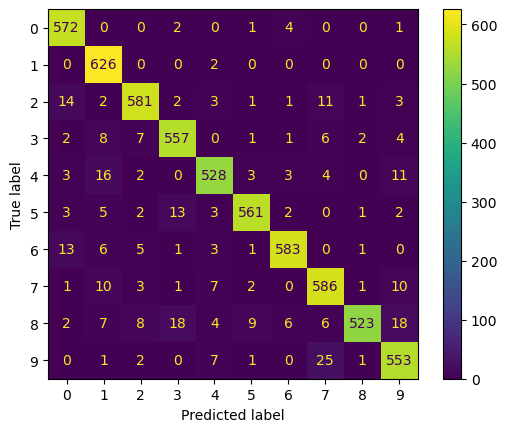

In [66]:
ConfusionMatrixDisplay.from_predictions(
   y_test, y_pred)
plt.show()

# Using MLPClassifier

In [74]:
#Create an MLPClassifier model
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=42)
#Train the model on the training data
clf.fit(X_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=42,
              solver='lbfgs')

In [75]:
#Make predictions on the test data
y_pred = clf.predict(X_test)
#Calculate the accuracy of the model 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.73


In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       580
           1       0.76      0.82      0.79       628
           2       0.83      0.74      0.78       619
           3       0.58      0.62      0.60       588
           4       0.75      0.62      0.68       570
           5       0.55      0.55      0.55       592
           6       0.88      0.86      0.87       613
           7       0.69      0.83      0.76       621
           8       0.78      0.65      0.71       601
           9       0.70      0.81      0.75       590

    accuracy                           0.73      6002
   macro avg       0.73      0.72      0.72      6002
weighted avg       0.73      0.73      0.72      6002



## Hyperparameter of KNN

In [78]:
param_grid = {'n_neighbors': list(range(1, 6)),'weights':['uniform', 'distance']}

In [79]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

In [80]:
grid_search.fit(XX, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [81]:
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Best value of k: {best_k}")
print(f"Best cross-validation score: {best_score}")


Best value of k: 4
Best cross-validation score: 0.939786737754082


# Using Decision Tree

In [115]:
#Initialize and train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [116]:
# Evaluate the model
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.826057980673109


In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       580
           1       0.92      0.94      0.93       628
           2       0.84      0.80      0.82       619
           3       0.79      0.78      0.79       588
           4       0.78      0.78      0.78       570
           5       0.78      0.81      0.79       592
           6       0.85      0.88      0.87       613
           7       0.88      0.88      0.88       621
           8       0.79      0.74      0.76       601
           9       0.76      0.78      0.77       590

    accuracy                           0.83      6002
   macro avg       0.82      0.82      0.82      6002
weighted avg       0.83      0.83      0.83      6002



# Using Support Vector Classifier

In [87]:
# Initialize and train the SVC model
msv = SVC(kernel='linear')  # You can use different kernels like 'linear', 'rbf', 'poly', etc.
msv.fit(X_train, y_train)

SVC(kernel='linear')

In [88]:
# Evaluate the model
y_pred = msv.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8905364878373876


In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       580
           1       0.94      0.96      0.95       628
           2       0.88      0.89      0.88       619
           3       0.85      0.89      0.87       588
           4       0.84      0.88      0.86       570
           5       0.88      0.88      0.88       592
           6       0.94      0.91      0.93       613
           7       0.93      0.89      0.91       621
           8       0.90      0.81      0.85       601
           9       0.88      0.85      0.86       590

    accuracy                           0.89      6002
   macro avg       0.89      0.89      0.89      6002
weighted avg       0.89      0.89      0.89      6002



In [101]:
# Evaluate the model
y_pred = nbc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.22609130289903365


In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.13      0.83      0.23       580
           1       0.38      0.97      0.54       628
           2       0.67      0.04      0.07       619
           3       0.20      0.07      0.11       588
           4       0.60      0.02      0.03       570
           5       0.69      0.08      0.14       592
           6       0.41      0.02      0.05       613
           7       0.46      0.14      0.22       621
           8       0.23      0.03      0.05       601
           9       0.54      0.04      0.08       590

    accuracy                           0.23      6002
   macro avg       0.43      0.22      0.15      6002
weighted avg       0.43      0.23      0.15      6002



# Using Random Forest Classifier

In [124]:
# Initialize and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [125]:
# Evaluate the model
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9523492169276908


In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       580
           1       0.97      1.00      0.98       628
           2       0.94      0.96      0.95       619
           3       0.95      0.94      0.95       588
           4       0.93      0.93      0.93       570
           5       0.96      0.94      0.95       592
           6       0.97      0.97      0.97       613
           7       0.96      0.96      0.96       621
           8       0.96      0.93      0.94       601
           9       0.92      0.90      0.91       590

    accuracy                           0.95      6002
   macro avg       0.95      0.95      0.95      6002
weighted avg       0.95      0.95      0.95      6002



# Comparison Between Classifiers

In [122]:
# Create a DataFrame to display the results
results_df = pd.DataFrame({'Classifier':['KNN', 'MLP', 'Decision Tree', 'SVC', 'Random Forest'],
                           'Accuracy':[0.9446851049650117, 0.73, 0.826057980673109, 0.8905364878373876, 0.9523492169276908]})

# Display the results
print(results_df)

      Classifier  Accuracy
0            KNN  0.944685
1            MLP  0.730000
2  Decision Tree  0.826058
3            SVC  0.890536
4  Random Forest  0.952349
